In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(12,7)
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Loading the dataset

In [3]:
df =  pd.read_csv('Downloads/banking.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
14041,36,services,married,high.school,unknown,no,yes,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0


In [6]:
df.tail(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
null = df.isnull().sum()
null[null>0]


Series([], dtype: int64)

In [9]:
null

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Through the info and isnull function we can see that there no null values in the dataset.

In [10]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
tukey=pairwise_tukeyhsd(df.y,df.education,alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
           basic.4y            basic.6y  -0.0205  0.197 -0.0453 0.0044  False
           basic.4y            basic.9y  -0.0242 0.0034 -0.0435 -0.005   True
           basic.4y         high.school   0.0059    0.9 -0.0119 0.0236  False
           basic.4y          illiterate   0.1197 0.7188 -0.1061 0.3456  False
           basic.4y professional.course    0.011 0.6749 -0.0088 0.0308  False
           basic.4y   university.degree   0.0348  0.001  0.0176 0.0519   True
           basic.4y             unknown   0.0425  0.001  0.0152 0.0698   True
           basic.6y            basic.9y  -0.0038    0.9 -0.0272 0.0197  False
           basic.6y         high.school   0.0263  0.008  0.0041 0.0486   True
           basic.6y          illiterate   0.1402 0.5566 -0.0861 

In [38]:
df.education.replace(['basic.4y','basic.6y'], 'basic.4y', inplace = True)

In [205]:
df.education.replace(['uneducated','illiterate'], 'illiterate', inplace = True)

In [206]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.4y                6468
basic.9y                6045
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [40]:
df_num = df.select_dtypes(['int64','float64'])
df_num

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,210.0,1.0,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,138.0,1.0,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,339.0,3.0,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,185.0,2.0,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,137.0,1.0,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,59.0,222.0,1.0,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31.0,196.0,2.0,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42.0,62.0,3.0,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48.0,200.0,2.0,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [41]:
df_cat = df.select_dtypes(['O'])
df_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


# Taking all numerical columns from full dataset

In [13]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

age


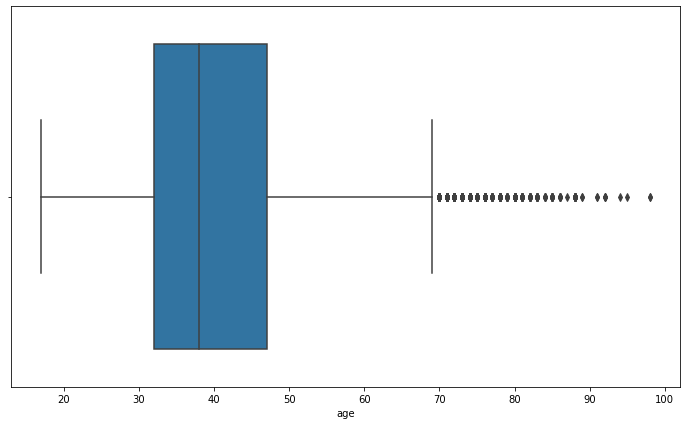

duration


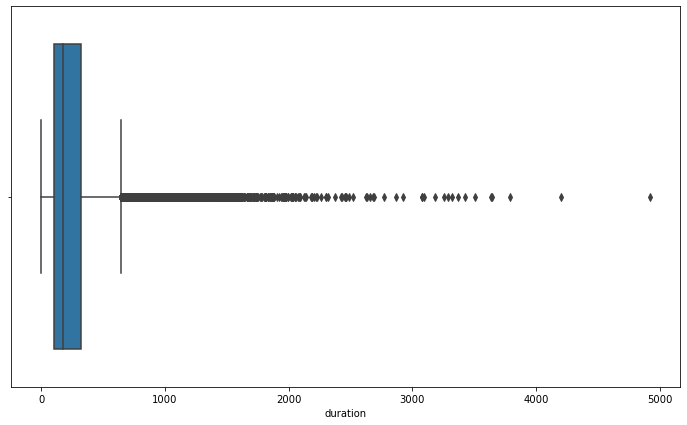

campaign


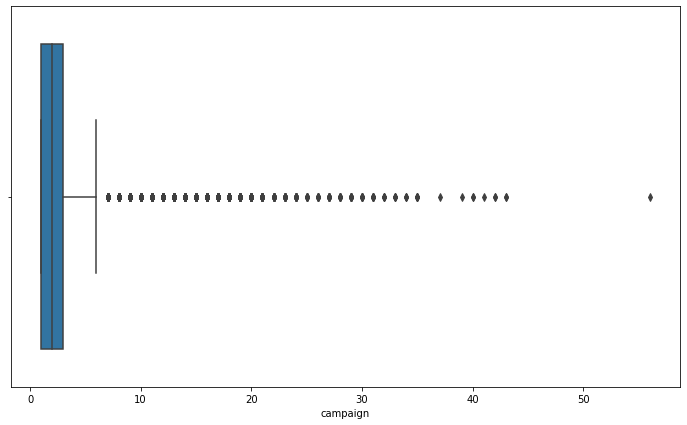

In [18]:
l=[0,10,11]

for i in df.iloc[:,l].columns:
    print(i)
    sns.boxplot(df_num[i])
    plt.show()

# Itseems like there are more outliers in age, duration, campaign columns.       



# Using log func to check, whether it can remove outliers!!

age


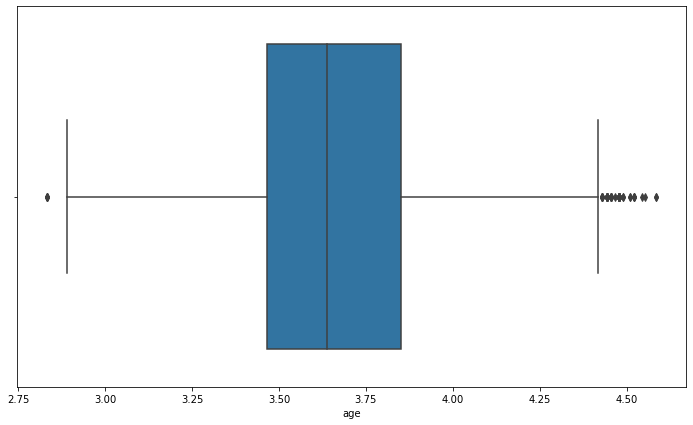

duration


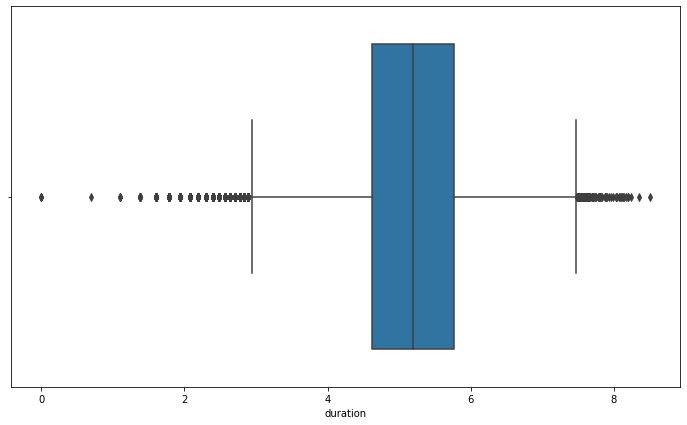

campaign


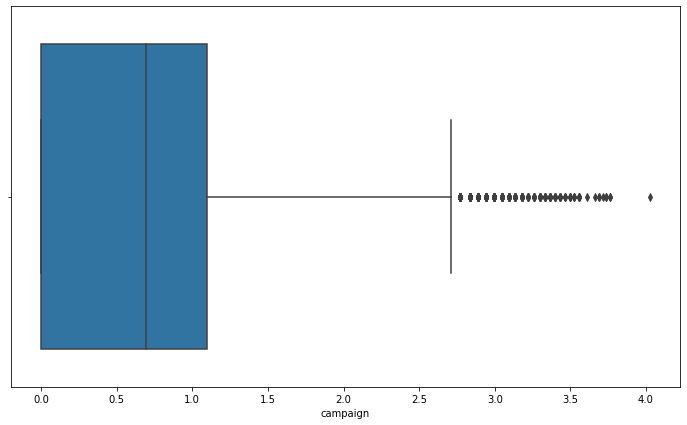

In [19]:
for i in df.iloc[:,l].columns:
    print(i)
    sns.boxplot(np.log(df_num[i]))
    plt.show()


In [44]:
df.age.quantile(.75)

47.0

In [45]:
l=[0,10,11]
def Outlier(df):
    for column in df.iloc[:,l].columns:
        if df[column].dtype!='str':
            Q1=np.percentile(df[column],25)
            Q3=np.percentile(df[column],75)
            IQR= Q3-Q1
            lower=Q1-(1.5* IQR)
            upper=Q3+(1.5* IQR)
            df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
            df.loc[:,column] =np.where(df[column].values<lower,lower,df[column].values)
    return df
 
df2=Outlier(df)
print(df2.columns)
df2.head()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


age


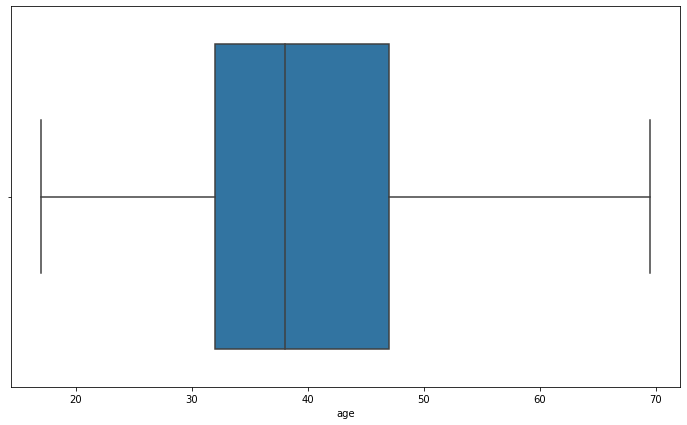

duration


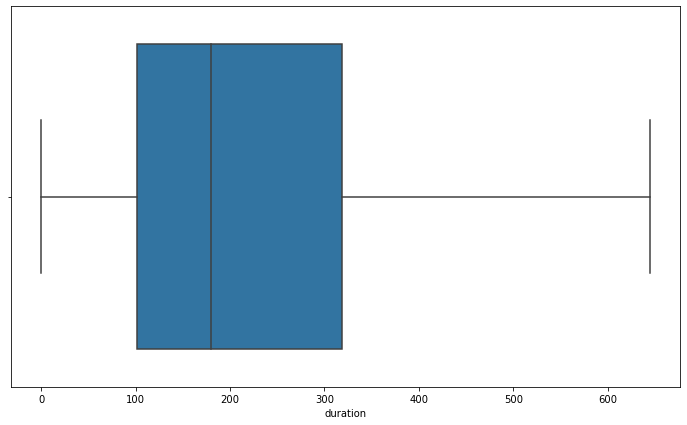

campaign


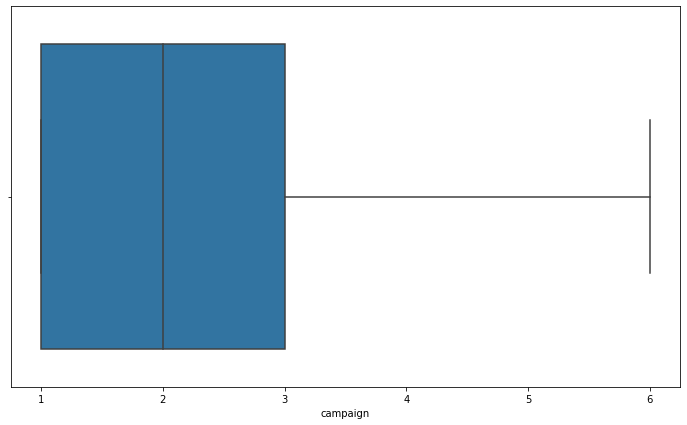

In [46]:
for i in df.iloc[:,l].columns:
    print(i)
    sns.boxplot(df2[i])
    plt.show()

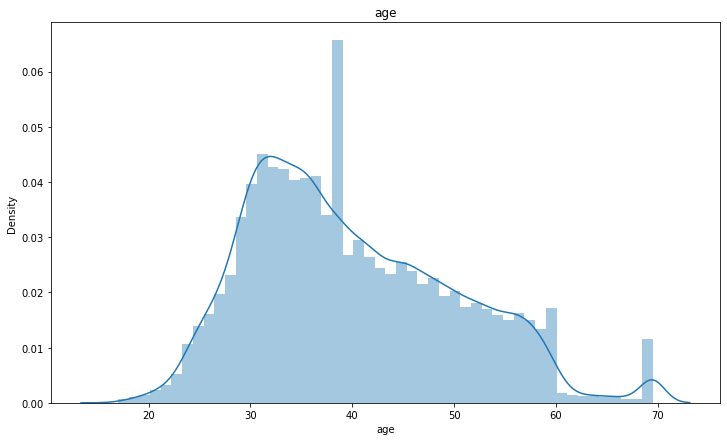

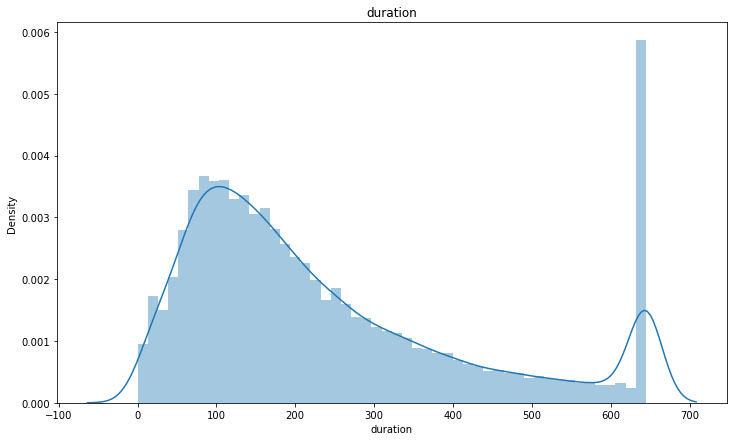

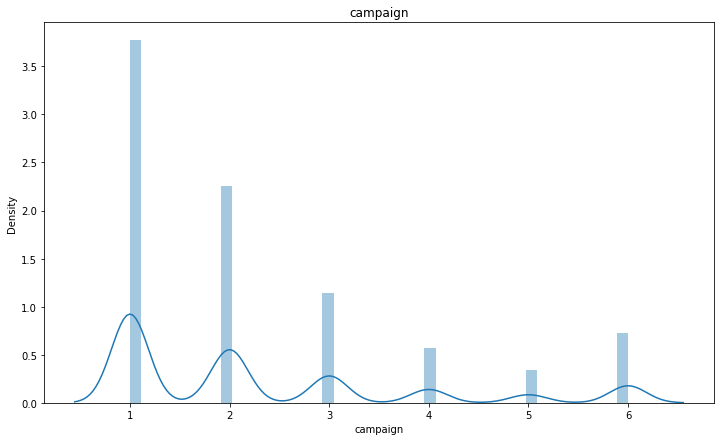

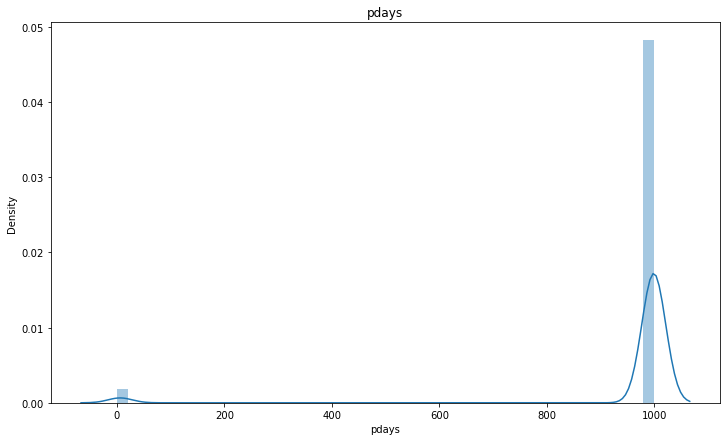

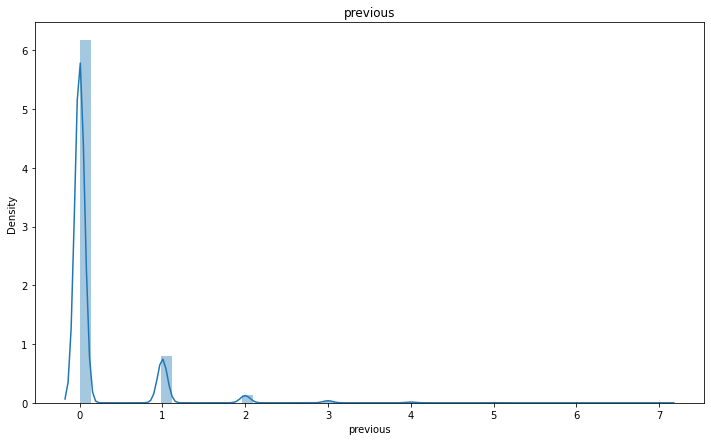

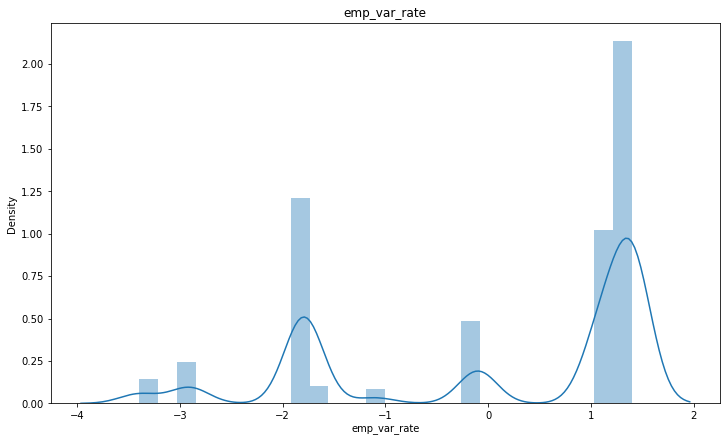

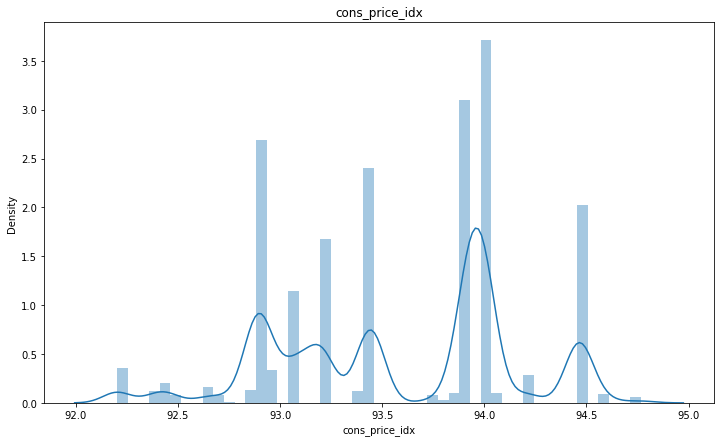

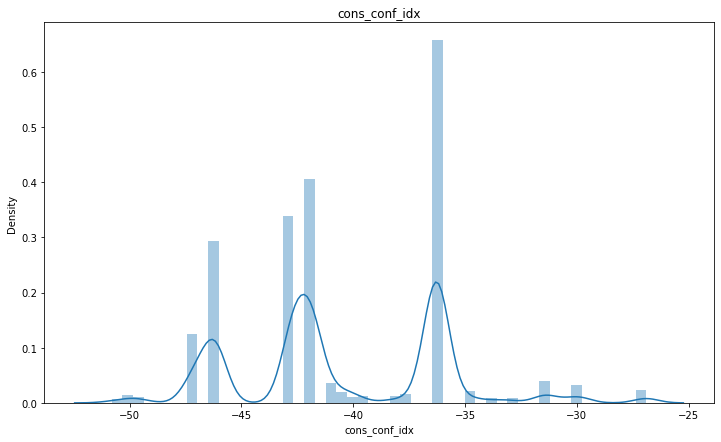

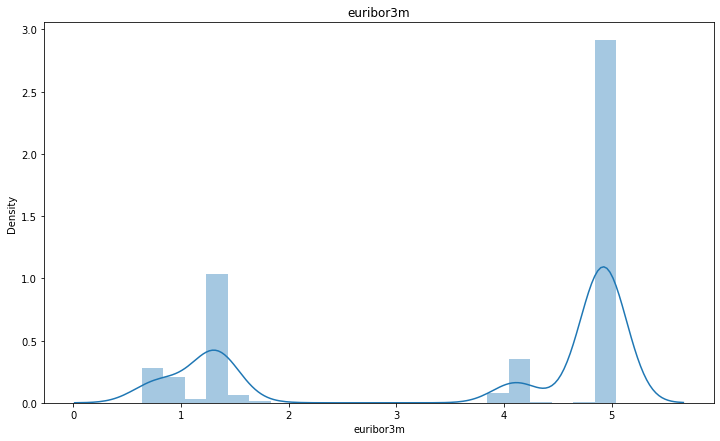

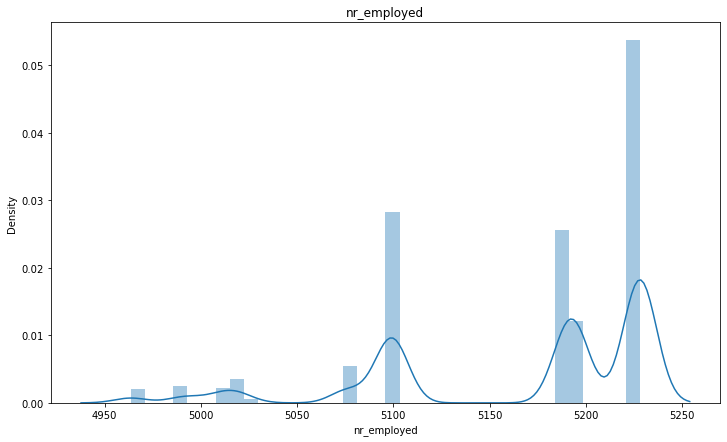

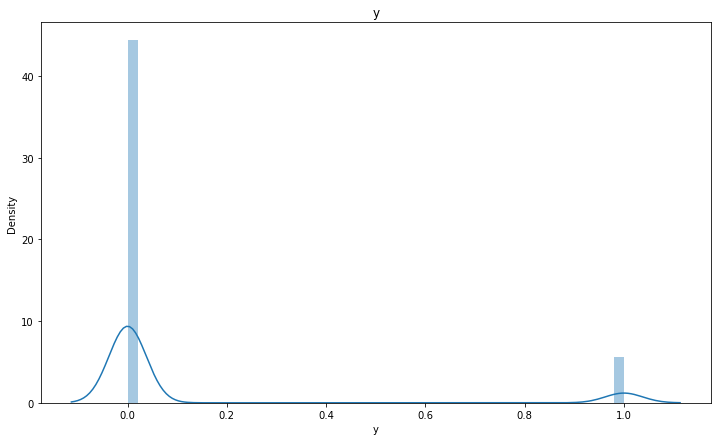

In [48]:
for i in df_num.columns:
    sns.distplot(df2[i])
    plt.title(i)
    plt.show()

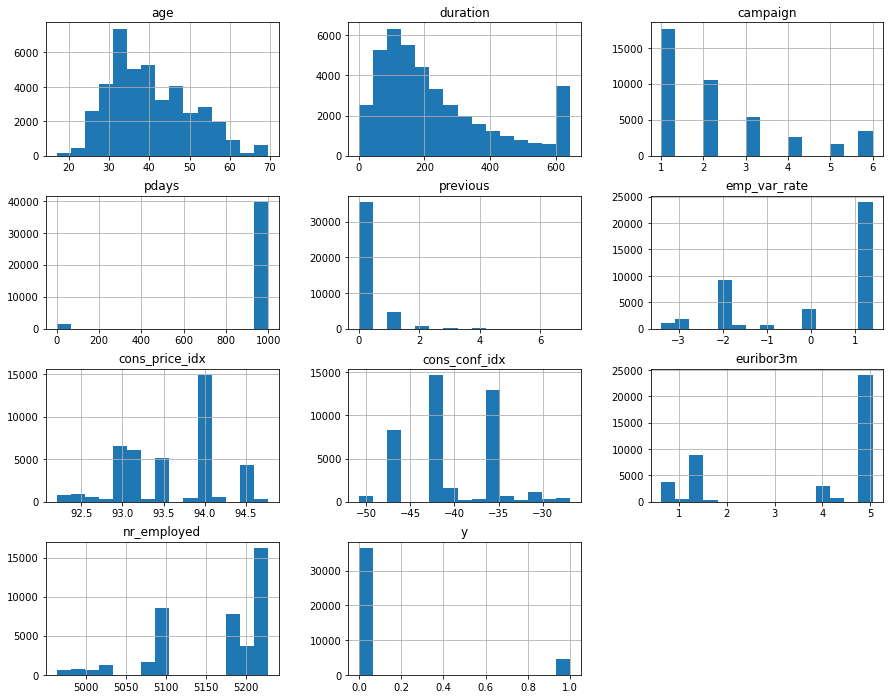

In [23]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

<AxesSubplot:>

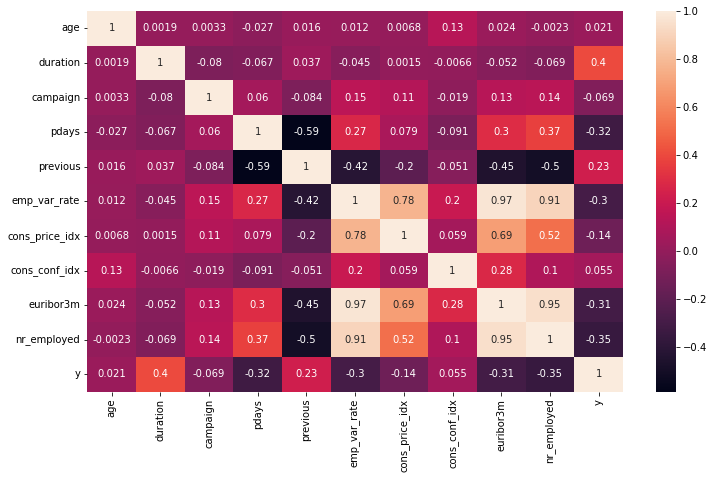

In [50]:
sns.heatmap(df2.corr(),annot = True)


In [25]:
df2.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,7,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [173]:
df2.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.939485,234.997317,2.275274,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.129367,177.353309,1.550510,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,69.500000,644.500000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# We will try to build a model with existing data and check for accuracy!

In [54]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [31]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [51]:
df2.education.replace('unknown','uneducated', inplace = True)

In [52]:
df2.education.value_counts()

university.degree      12168
high.school             9515
basic.4y                6468
basic.9y                6045
professional.course     5243
uneducated              1731
illiterate                18
Name: education, dtype: int64

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [66]:
df_cat = df.select_dtypes('object')
for i in df2.columns:
    print('-->', i)
    print(df2[i].value_counts())
    print('------------------')

--> age
31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
34.0    1745
30.0    1714
37.0    1475
29.0    1453
39.0    1432
38.0    1407
41.0    1278
40.0    1161
42.0    1142
45.0    1103
43.0    1055
46.0    1030
44.0    1011
28.0    1001
48.0     979
47.0     928
50.0     875
27.0     851
49.0     839
52.0     779
51.0     754
53.0     733
56.0     704
26.0     698
54.0     684
55.0     648
57.0     646
25.0     598
58.0     576
69.5     469
24.0     463
59.0     463
60.0     283
23.0     226
22.0     137
21.0     102
61.0      73
20.0      65
62.0      62
64.0      57
66.0      57
63.0      55
65.0      44
19.0      42
69.0      34
68.0      33
18.0      28
67.0      26
17.0       5
Name: age, dtype: int64
------------------
--> job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student  

<AxesSubplot:xlabel='marital', ylabel='y'>

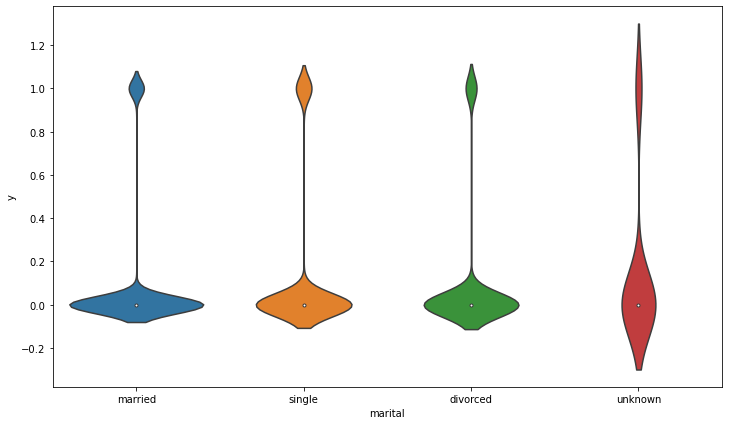

In [212]:
sns.violinplot(x = df.marital, y =df.y, data = df)

In [134]:
pd.DataFrame(df2.groupby(['education','job'])['job'].size())

job
education job               
basic.4y  admin.          77
          blue-collar   2318
          entrepreneur   137
          housemaid      474
          management     100
...                      ...
unknown   services       150
          student        167
          technician     212
          unemployed      19
          unknown        131

[90 rows x 1 columns]

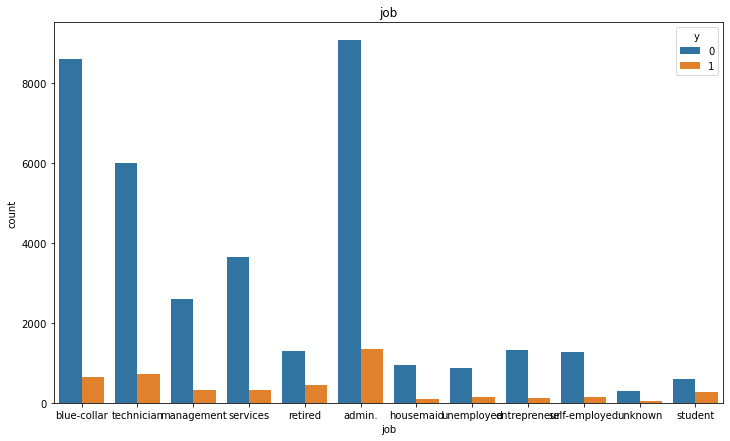

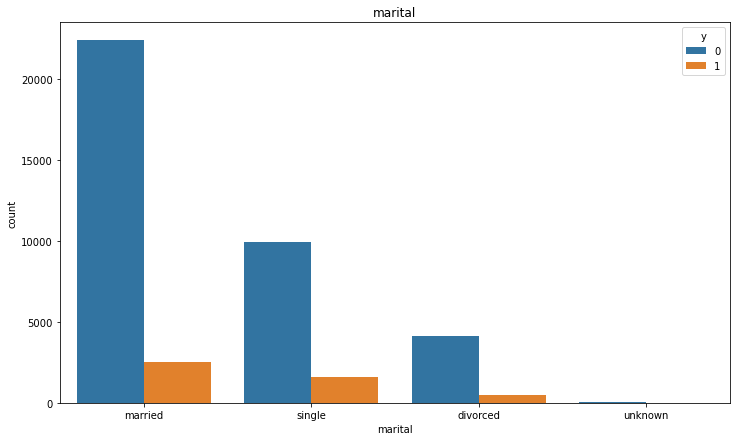

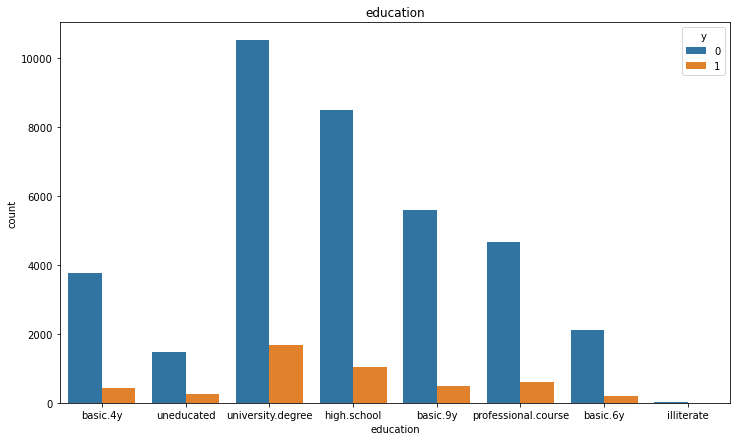

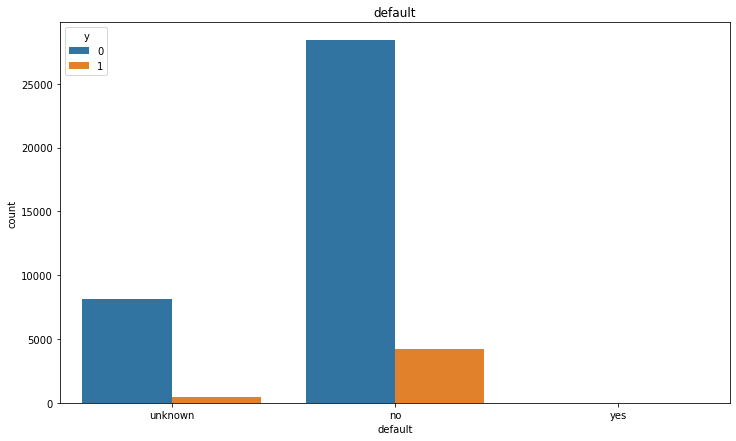

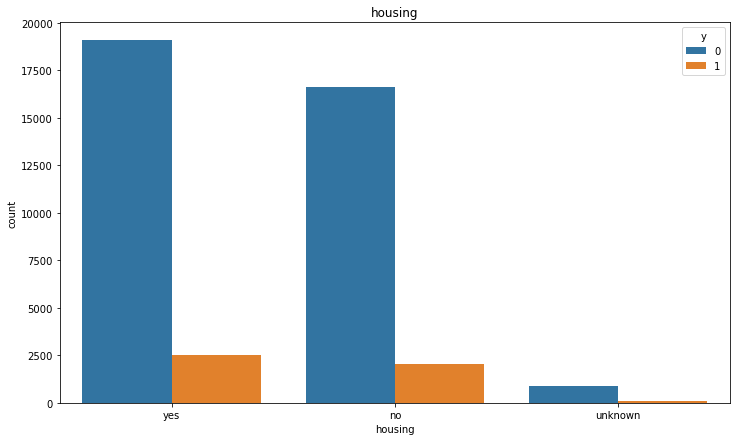

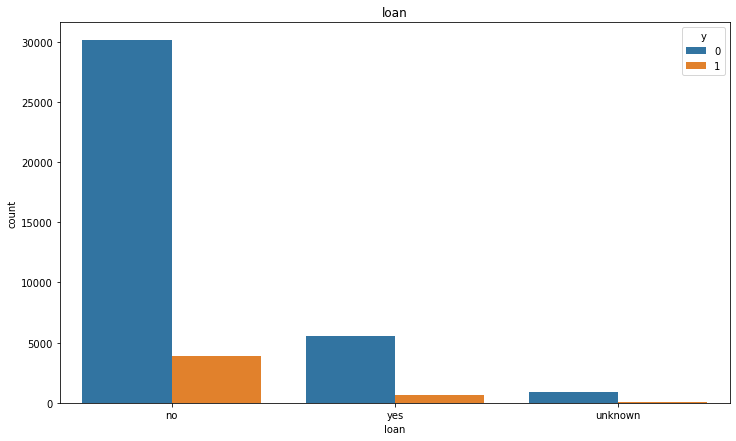

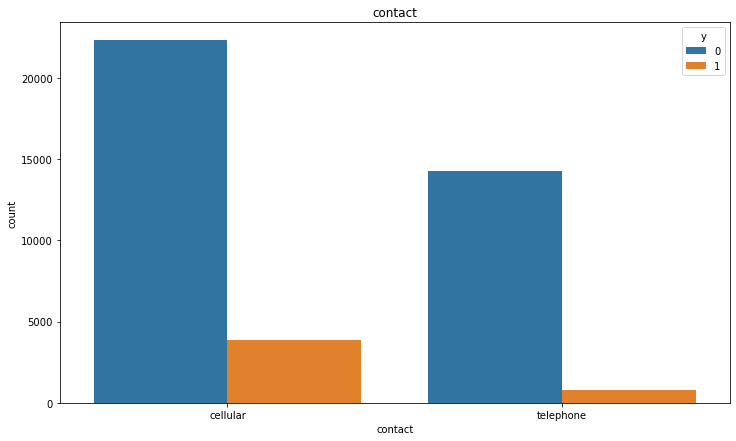

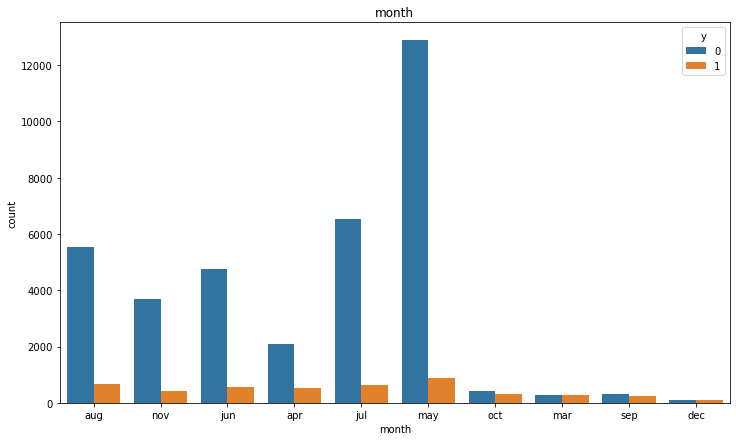

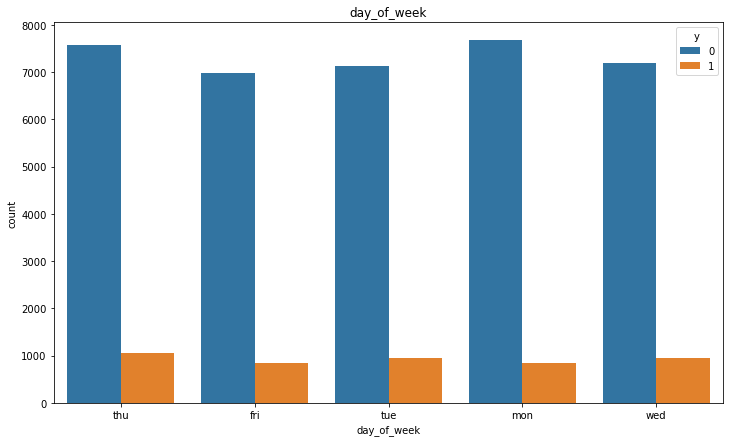

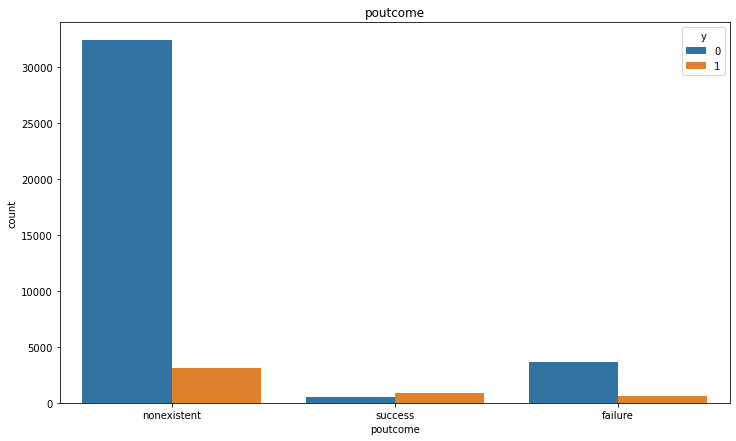

In [61]:
for i in df_cat.columns:
    sns.countplot(x=df[i], hue=df.y)
    plt.title(i)
    plt.show()
    

In [56]:
df_d= pd.get_dummies(data = df2, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome'] )
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   contact                        41188 non-null  object 
 2   month                          41188 non-null  object 
 3   day_of_week                    41188 non-null  object 
 4   duration                       41188 non-null  float64
 5   campaign                       41188 non-null  float64
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp_var_rate                   41188 non-null  float64
 9   cons_price_idx                 41188 non-null  float64
 10  cons_conf_idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr_employed                    41188 non-null 

In [57]:
dum = df_d.drop(['contact', 'month', 'day_of_week'], axis = 1)

In [58]:
dum.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_uneducated',
       'education_university.degree', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [59]:
X = dum.drop(['y'] , axis = 1)
y = dum['y']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [67]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_confusion_matrix,plot_roc_curve
MLA = [
       linear_model.LogisticRegression(),
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
       svm.SVC(),
       XGBClassifier()
]

In [63]:
name = []
testscore = []
trainscore = []
diff = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    test_pred = alg.predict(X_test)
    train_pred = alg.predict(X_train)
   # d = test_pred - trainscore
    testscore.append(accuracy_score(y_test, test_pred))
    trainscore.append(accuracy_score(y_train, train_pred))
   # d = test_pred - trainscore
   # diff.append(d)


In [64]:
comparison_1 = pd.DataFrame({"name": name, "testscore": testscore, 'trainscore': trainscore })
comparison_1

,name,testscore,trainscore
0,LogisticRegression,0.908068,0.906316
1,AdaBoostClassifier,0.910172,0.908987
2,BaggingClassifier,0.910091,0.993514
3,GradientBoostingClassifier,0.913895,0.918005
4,RandomForestClassifier,0.910577,0.999827
5,SGDClassifier,0.892369,0.891402
6,GaussianNB,0.841385,0.840241
7,KNeighborsClassifier,0.906693,0.929763
8,DecisionTreeClassifier,0.887756,0.999861
9,ExtraTreeClassifier,0.871085,0.999861


# we will scale the data and check accuracy.
# MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge

age


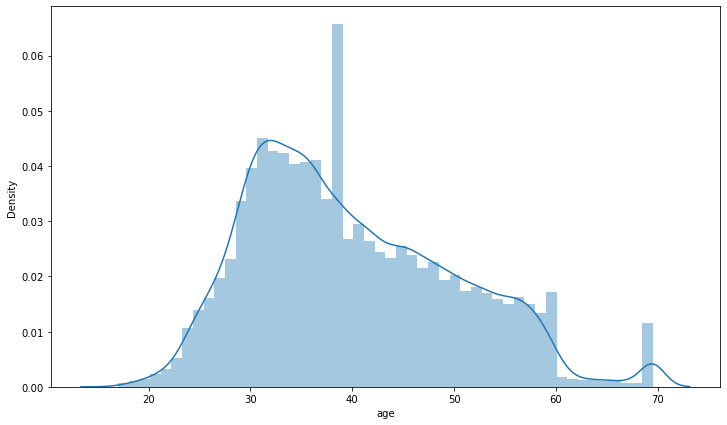

duration


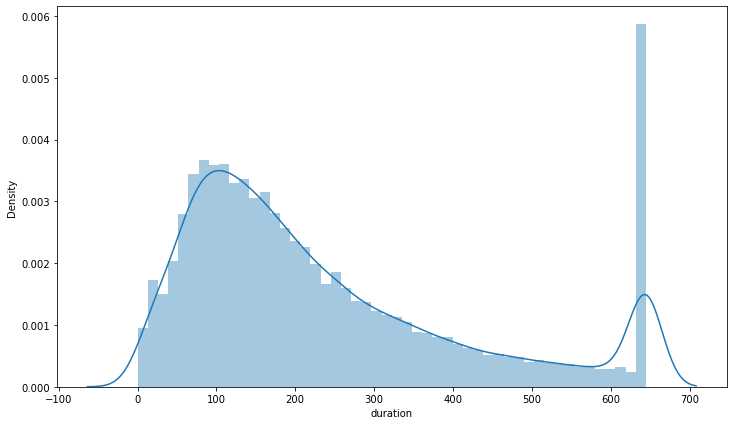

campaign


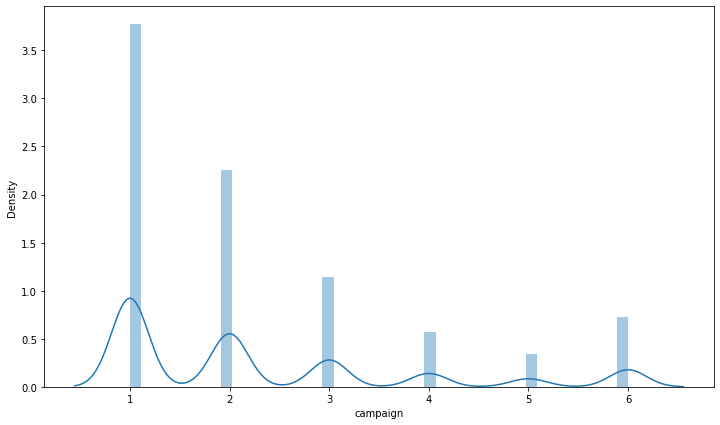

pdays


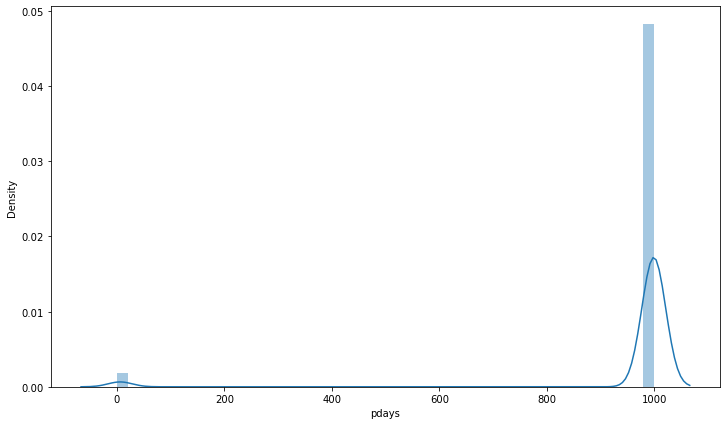

previous


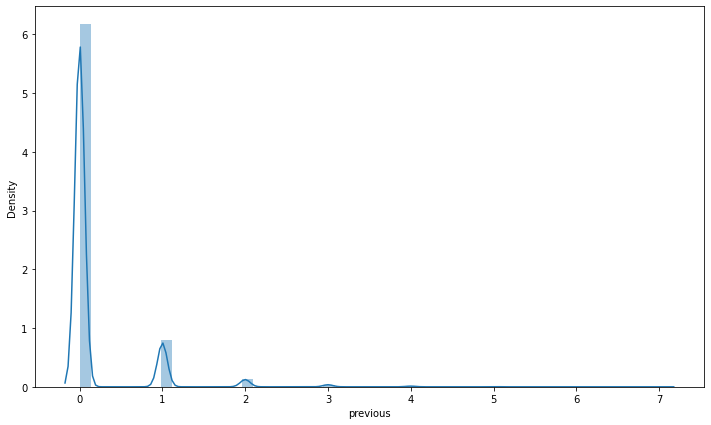

emp_var_rate


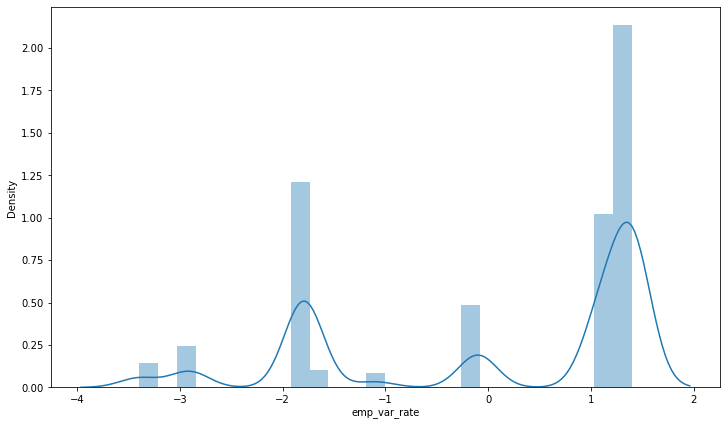

cons_price_idx


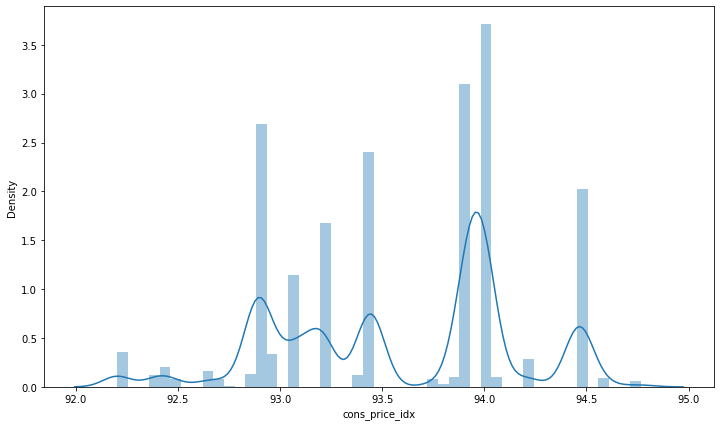

cons_conf_idx


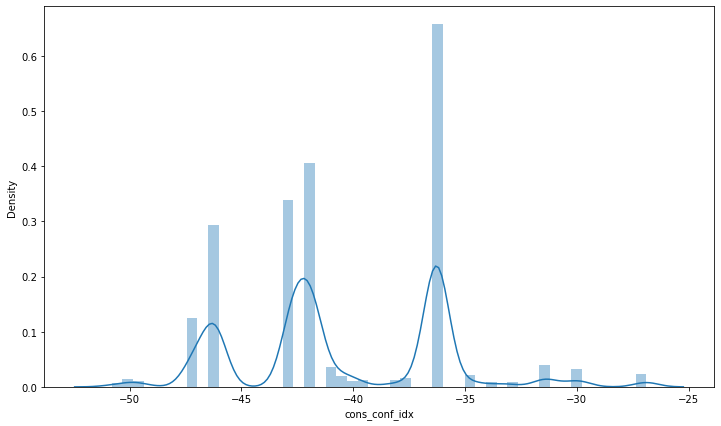

euribor3m


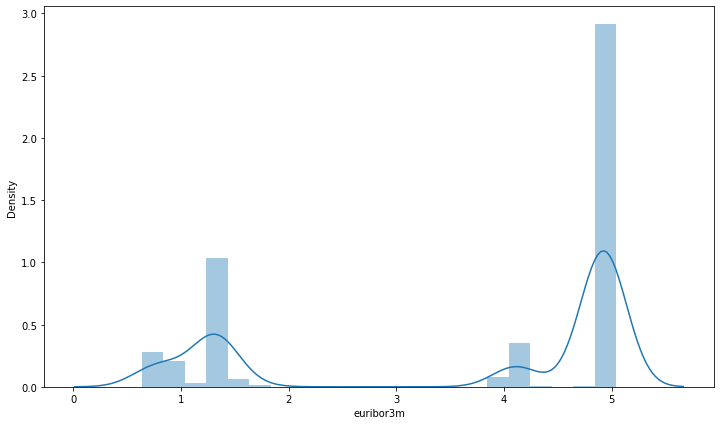

nr_employed


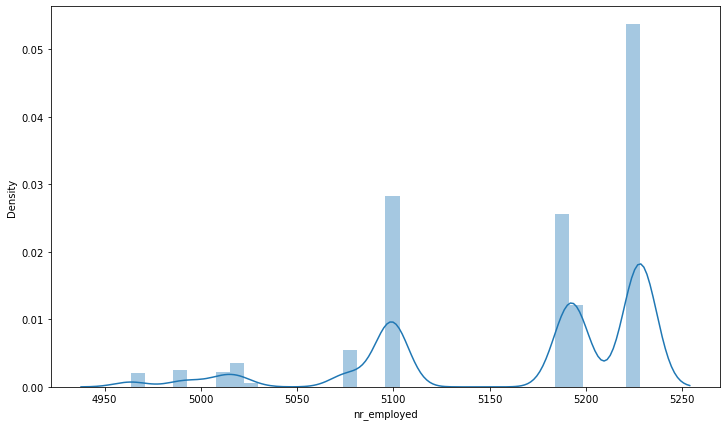

job_blue-collar


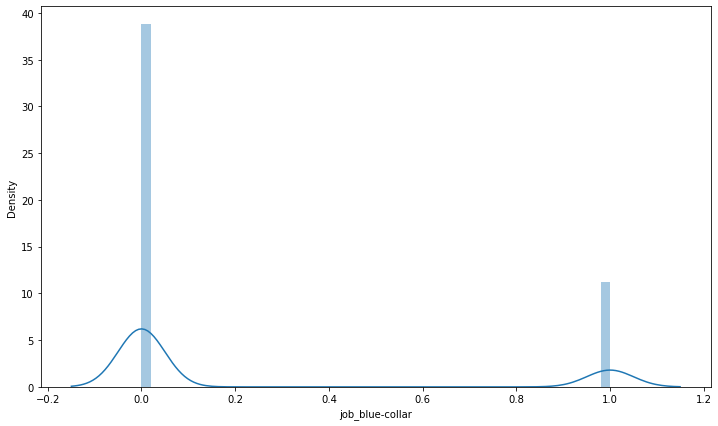

job_entrepreneur


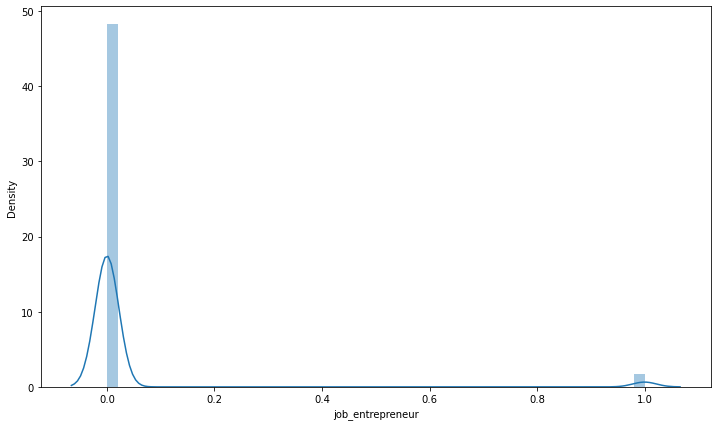

job_housemaid


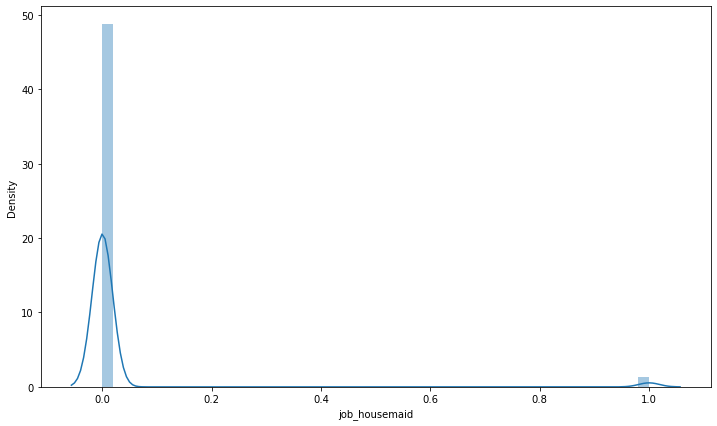

job_management


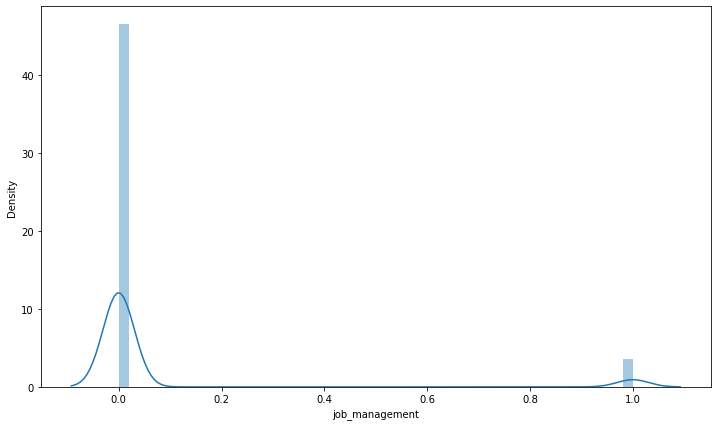

job_retired


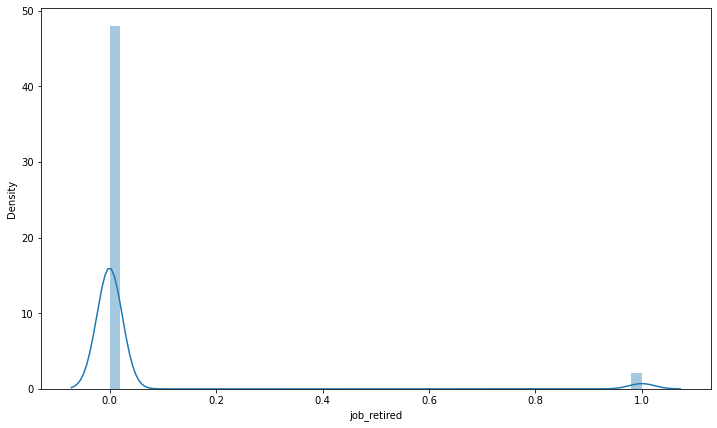

job_self-employed


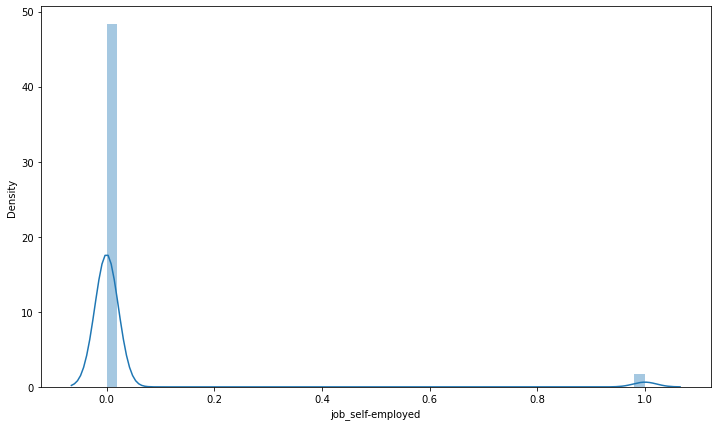

job_services


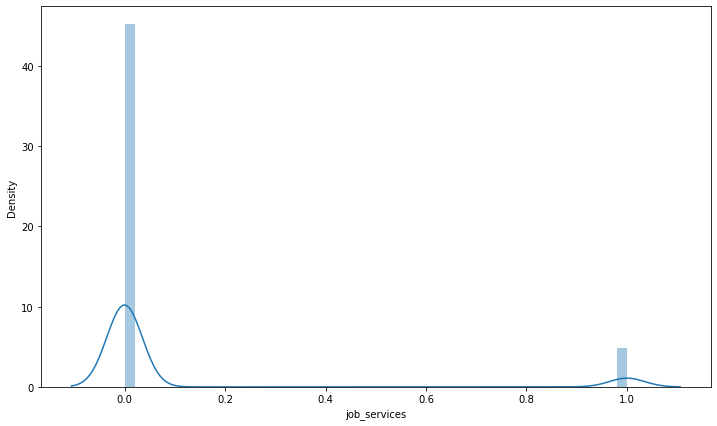

job_student


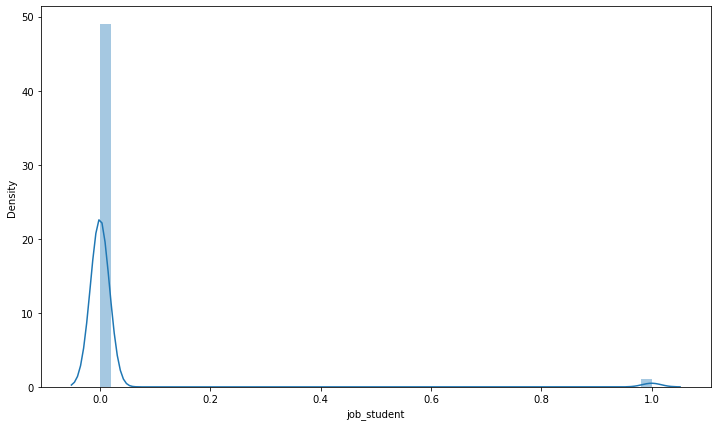

job_technician


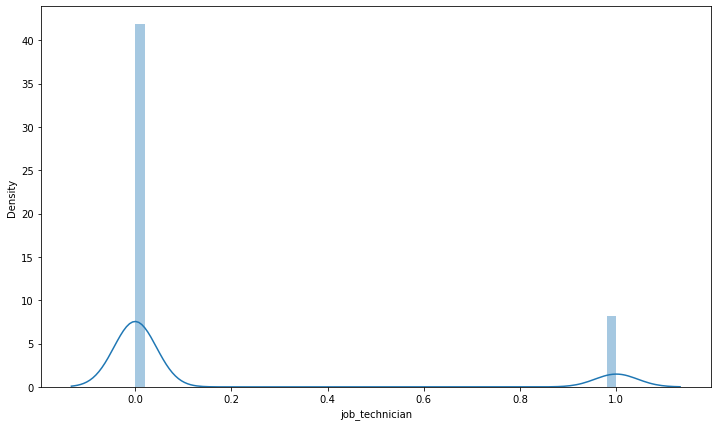

job_unemployed


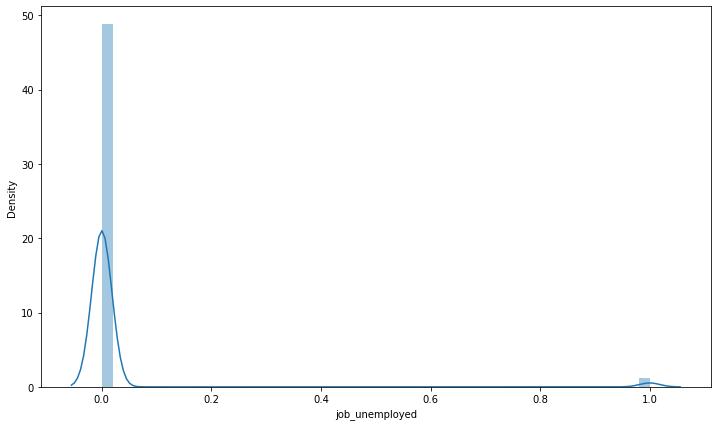

job_unknown


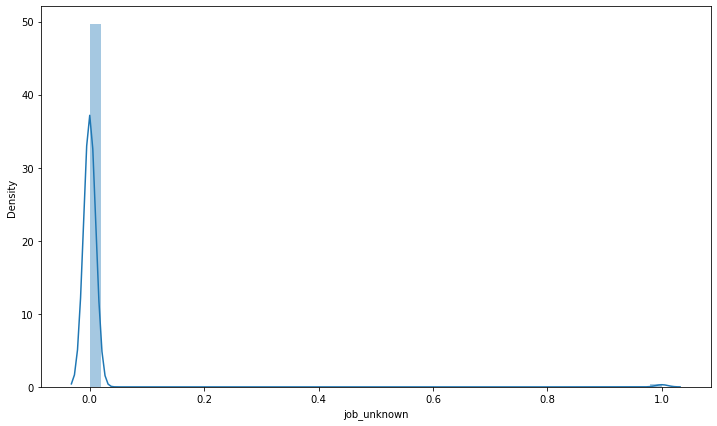

marital_married


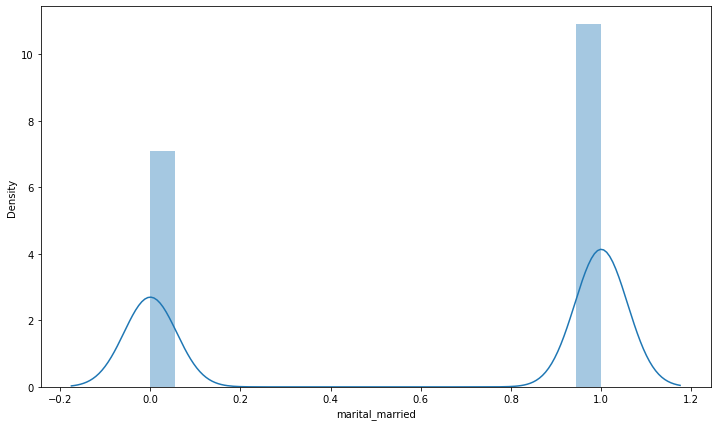

marital_single


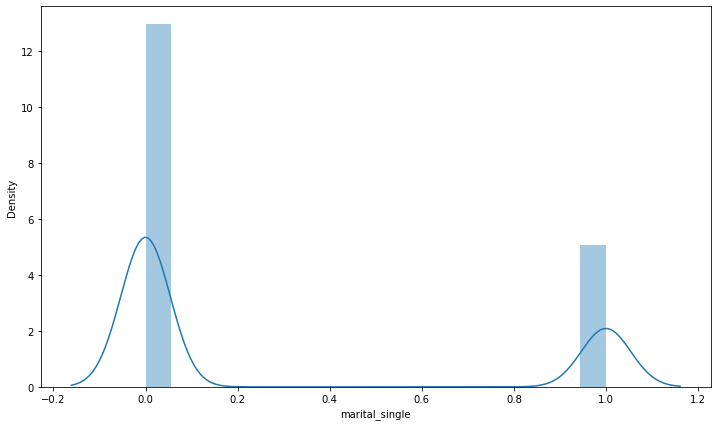

marital_unknown


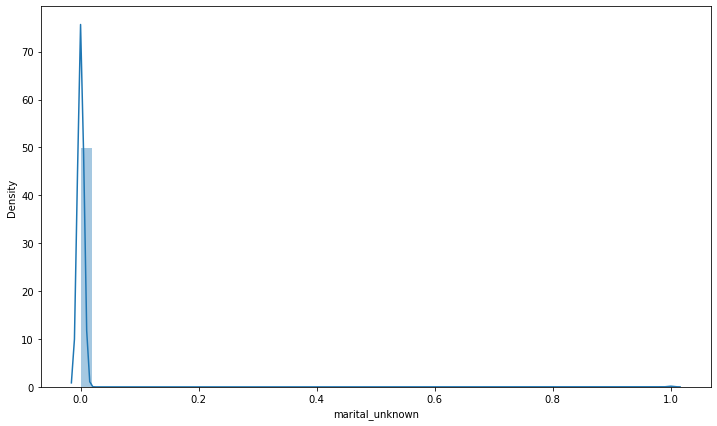

education_basic.6y


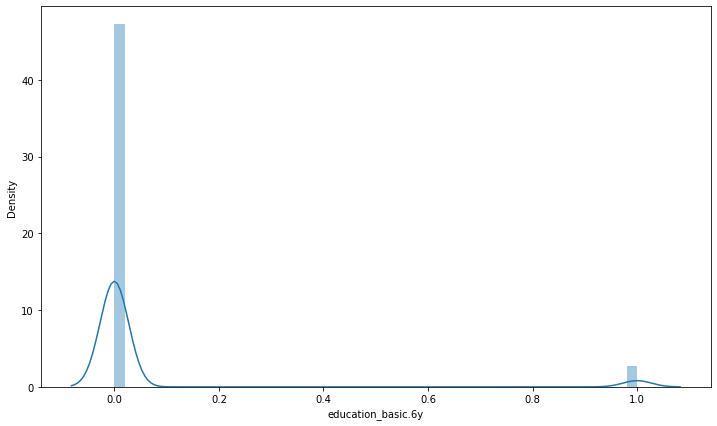

education_basic.9y


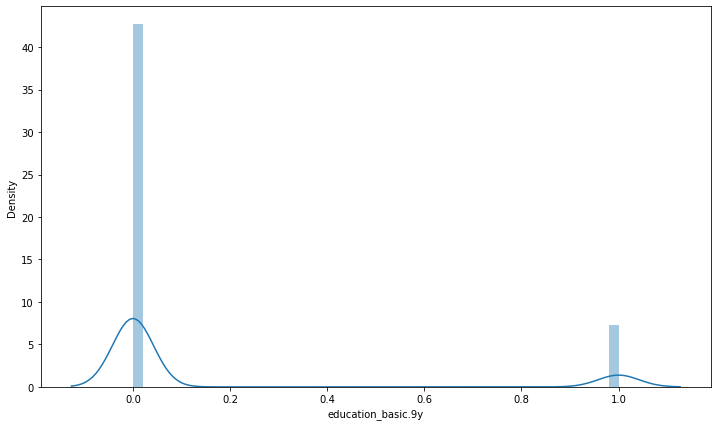

education_high.school


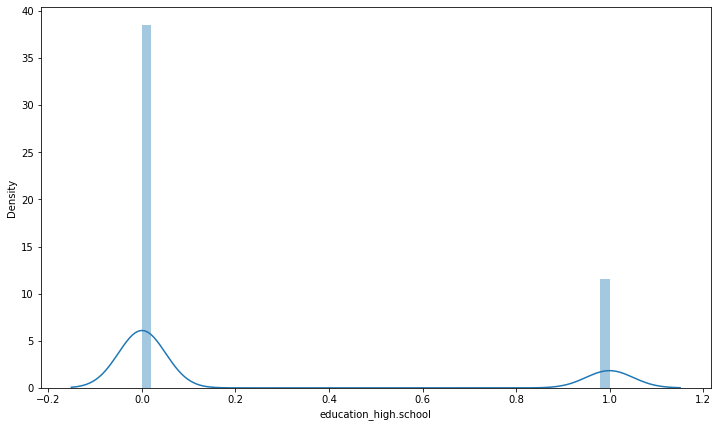

education_illiterate


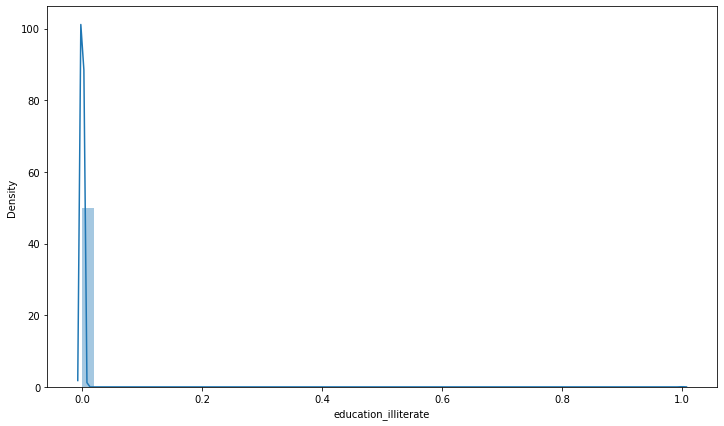

education_professional.course


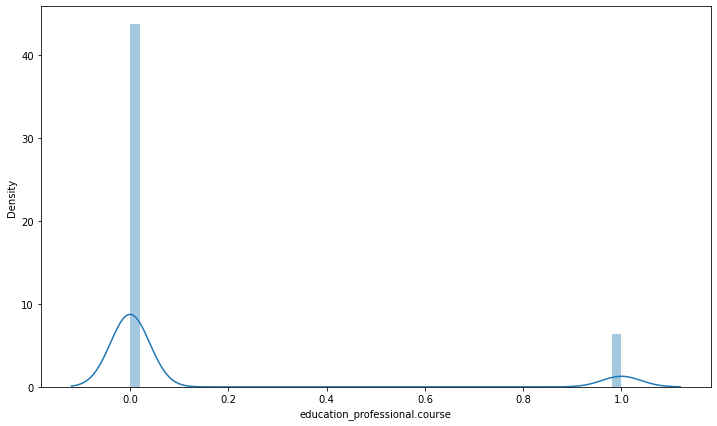

education_uneducated


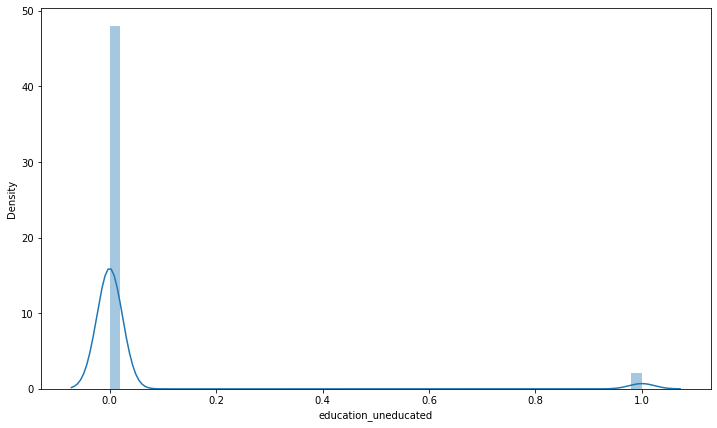

education_university.degree


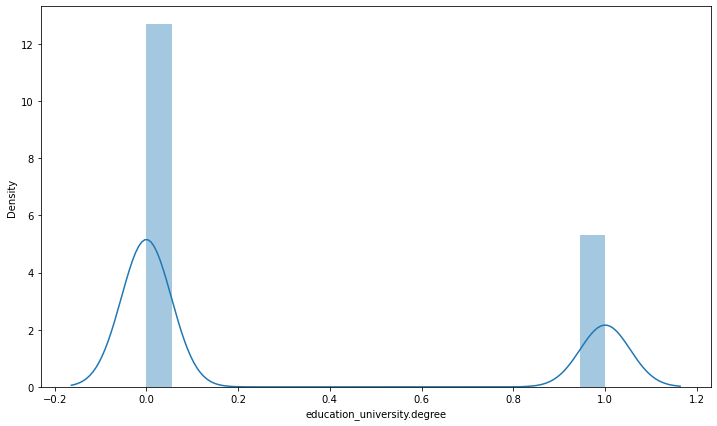

default_unknown


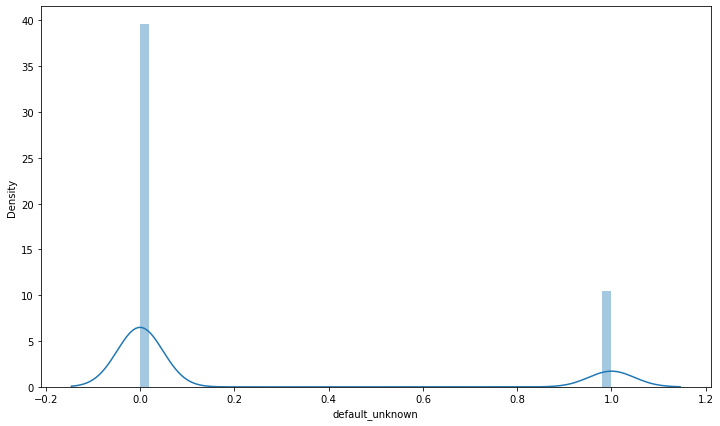

default_yes


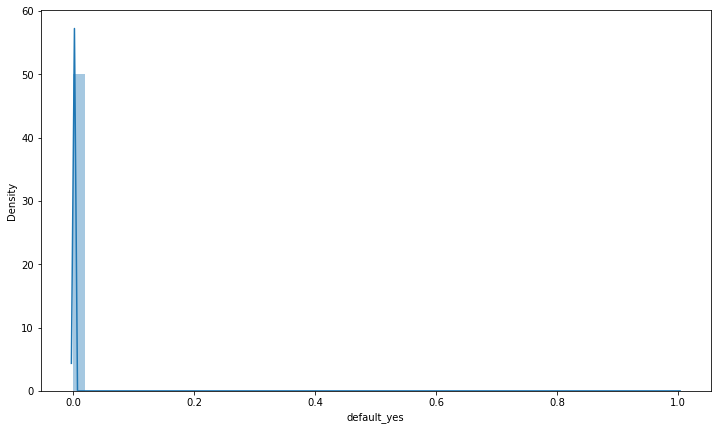

housing_unknown


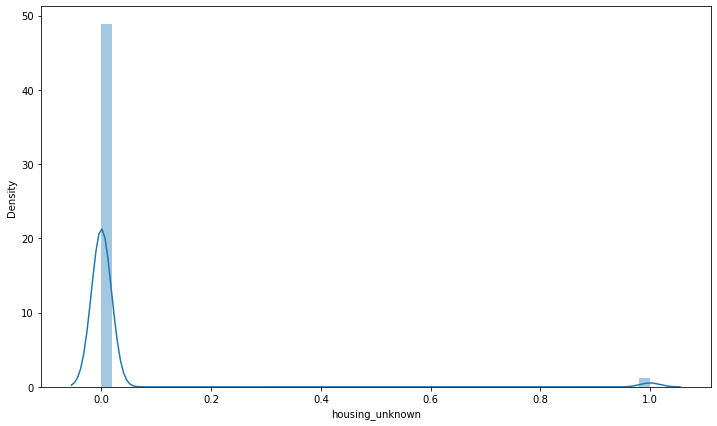

housing_yes


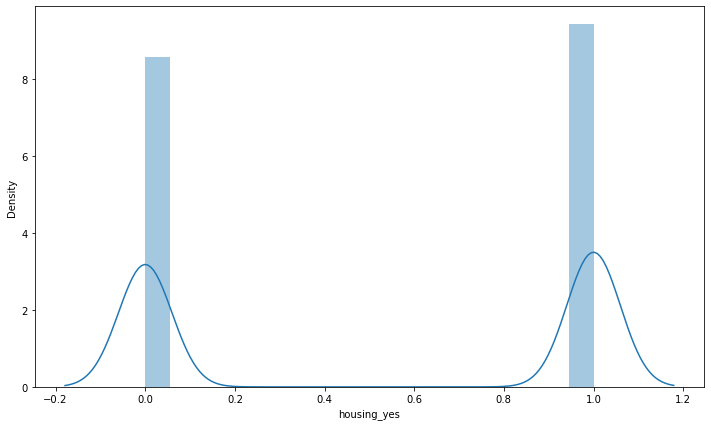

loan_unknown


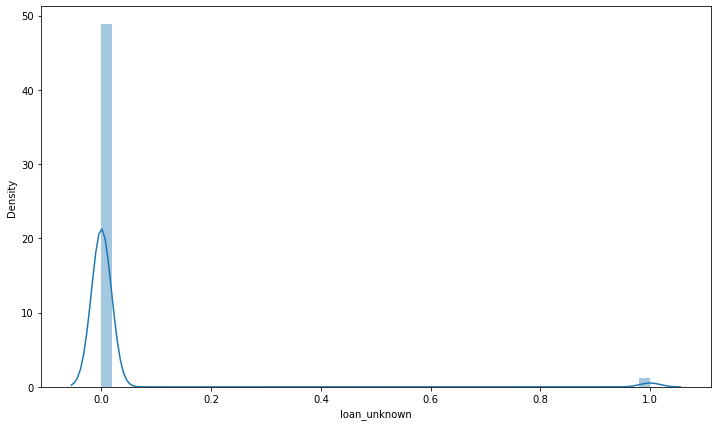

loan_yes


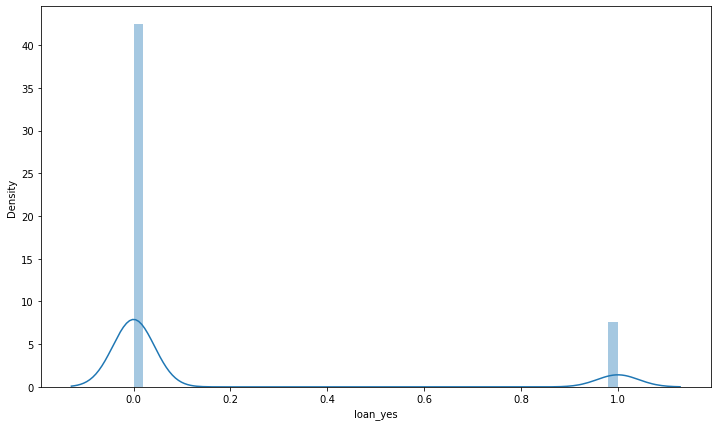

poutcome_nonexistent


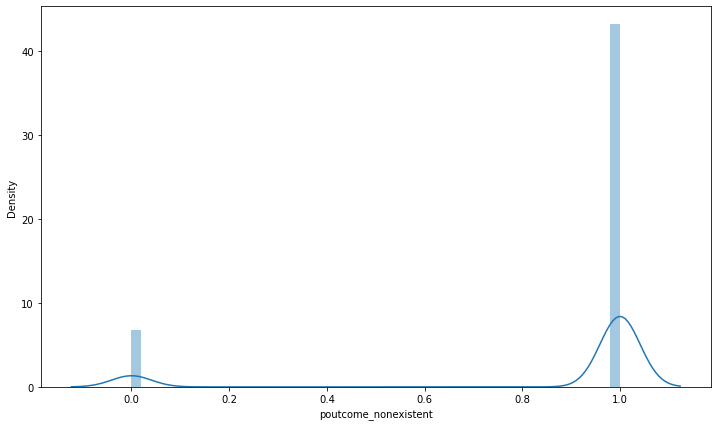

poutcome_success


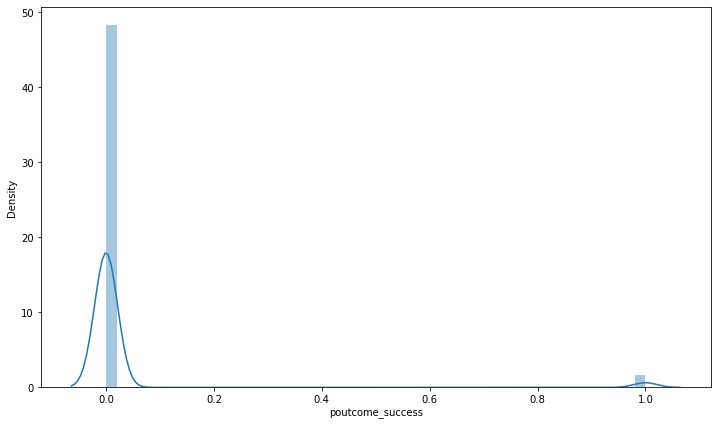

In [218]:
for i in X.columns:
    print(i)
    sns.distplot(X[i])
    plt.show()

In [68]:
from sklearn.preprocessing import  MinMaxScaler

mc = MinMaxScaler()
_mc = mc.fit_transform(dum)

#X_train_mc = mc.fit_transform(X_train)

#X_test_mc = mc.transform(X_test)
dum.columns
X_mc = dum.drop('y', axis = 1)
y_mc = dum['y']

In [69]:
X_train_mc,X_test_mc,y_train_mc,y_test_mc = train_test_split(X_mc,y_mc, test_size = 0.3 , random_state = 42)

In [70]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_mc, y_train_mc)
    test_pred = alg.predict(X_test_mc)
    testscore.append(accuracy_score(y_test_mc,test_pred))
    train_pred = alg.predict(X_train_mc)
    trainscore.append(accuracy_score(y_train_mc, train_pred))

comparison_2 = pd.DataFrame({"name": name, "testscore": testscore, 'trainscore': trainscore })
comparison_2

[13:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,testscore,trainscore
0,LogisticRegression,0.904427,0.909750
1,AdaBoostClassifier,0.905155,0.911311
2,BaggingClassifier,0.899814,0.992751
3,GradientBoostingClassifier,0.910901,0.919323
4,RandomForestClassifier,0.906288,0.999827
5,SGDClassifier,0.727118,0.725504
6,GaussianNB,0.845836,0.847837
7,KNeighborsClassifier,0.899976,0.931359
8,DecisionTreeClassifier,0.888161,0.999827
9,ExtraTreeClassifier,0.871166,0.999827


In [71]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train_mc)
print('Before', counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_mc, y_train_mc)
counter1 = Counter(y_train_sm)
print('After',counter1)

Before Counter({0: 25617, 1: 3214})
After Counter({0: 25617, 1: 25617})


In [243]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_sm, y_train_sm)
    test_pred = alg.predict(X_test)
    testscore.append(accuracy_score(y_test,test_pred))
    train_pred = alg.predict(X_train_sm)
    trainscore.append(accuracy_score(y_train_sm, train_pred))
    print(classification_report(y_test,test_pred))   
    #print(alg.__class__.__name__)
    print(confusion_matrix(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10971
           1       0.45      0.77      0.57      1386

    accuracy                           0.87     12357
   macro avg       0.71      0.83      0.75     12357
weighted avg       0.91      0.87      0.88     12357

[[9666 1305]
 [ 316 1070]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10971
           1       0.53      0.63      0.58      1386

    accuracy                           0.90     12357
   macro avg       0.74      0.78      0.76     12357
weighted avg       0.91      0.90      0.90     12357

[[10197   774]
 [  506   880]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10971
           1       0.86      0.83      0.85      1386

    accuracy                           0.97     12357
   macro avg       0.92      0.91      0.91     12357
weighted avg    

In [244]:
comparison_3 = pd.DataFrame({"name": name, "testscore": testscore, 'trainscore': trainscore })
comparison_3

,name,testscore,trainscore
0,LogisticRegression,0.868819,0.883886
1,AdaBoostClassifier,0.896415,0.930769
2,BaggingClassifier,0.965930,0.996779
3,GradientBoostingClassifier,0.897548,0.936995
4,RandomForestClassifier,0.972242,0.999902
5,SGDClassifier,0.807639,0.854374
6,GaussianNB,0.706320,0.806769
7,KNeighborsClassifier,0.882496,0.935980
8,DecisionTreeClassifier,0.964797,0.999902
9,ExtraTreeClassifier,0.958080,0.999902


In [98]:
! pip install imblearn

In [85]:
df_test = pd.read_csv('Downloads/new_test.csv')
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1
8235,33,7,1,3,0,0,0,0,4,1,472,1,0
8236,44,1,1,1,0,2,2,1,6,1,554,5,1


In [193]:
df_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [195]:
df1 = df.copy()
df1.drop([ 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed','previous'],axis = 1, inplace = True) 

In [199]:
df1.columns
df1.drop('pdays',axis = 1, inplace = True)

In [200]:
df1.columns
#df1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome'],axis = 1, inplace = True)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [121]:
#df1.drop(['duration', 'campaign', 'y'],axis = 1, inplace = True) 

In [201]:
df1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

# This is manual method to convert 'Object' to 'int' using label encoder

In [124]:
from sklearn.preprocessing import LabelEncoder
li = [1,2,3,4,5,6,7,8,9,12]
le = LabelEncoder()
job = pd.DataFrame(le.fit_transform(df.job))
marital = pd.DataFrame(le.fit_transform(df.marital))
education = pd.DataFrame(le.fit_transform(df.education))
default = pd.DataFrame(le.fit_transform(df.default))
housing = pd.DataFrame(le.fit_transform(df.housing))
loan = pd.DataFrame(le.fit_transform(df.loan))
contact = pd.DataFrame(le.fit_transform(df.contact))
month = pd.DataFrame(le.fit_transform(df.month))
day_of_week = pd.DataFrame(le.fit_transform(df.day_of_week))
poutcome = pd.DataFrame(le.fit_transform(df.poutcome))

In [187]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [127]:
df_en = pd.concat([df1,job, marital, education, default, housing, loan, contact, month, day_of_week, df.duration, df.campaign,poutcome,df.y],axis = 1)
df_en.columns = ['age','job','marital','education','default','housing', 'loan','contact','month','day_of_week','duration', 'campaign','poutcome','y']

In [130]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  float64
 1   job          41188 non-null  int32  
 2   marital      41188 non-null  int32  
 3   education    41188 non-null  int32  
 4   default      41188 non-null  int32  
 5   housing      41188 non-null  int32  
 6   loan         41188 non-null  int32  
 7   contact      41188 non-null  int32  
 8   month        41188 non-null  int32  
 9   day_of_week  41188 non-null  int32  
 10  duration     41188 non-null  float64
 11  campaign     41188 non-null  float64
 12  poutcome     41188 non-null  int32  
 13  y            41188 non-null  int64  
dtypes: float64(3), int32(10), int64(1)
memory usage: 2.8 MB


# This is using for loop for label encoding

In [202]:
from sklearn import preprocessing
for i in df_cat.columns:
    le = preprocessing.LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  float64
 1   job          41188 non-null  int32  
 2   marital      41188 non-null  int32  
 3   education    41188 non-null  int32  
 4   default      41188 non-null  int32  
 5   housing      41188 non-null  int32  
 6   loan         41188 non-null  int32  
 7   contact      41188 non-null  int32  
 8   month        41188 non-null  int32  
 9   day_of_week  41188 non-null  int32  
 10  duration     41188 non-null  float64
 11  campaign     41188 non-null  float64
 12  poutcome     41188 non-null  int32  
 13  y            41188 non-null  int64  
dtypes: float64(3), int32(10), int64(1)
memory usage: 2.8 MB


In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [131]:
df_c = pd.concat([df_en,df_test],axis = 0)
df_c

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,44.0,1,1,0,1,2,0,0,1,2,210.0,1.0,1,0.0
1,53.0,9,1,5,0,0,0,0,7,0,138.0,1.0,1,0.0
2,28.0,4,2,6,0,2,0,0,4,2,339.0,3.0,2,1.0
3,39.0,7,1,2,0,0,0,0,0,0,185.0,2.0,1,0.0
4,55.0,5,1,0,0,2,0,0,1,0,137.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48.0,4,1,2,0,2,0,0,6,3,554.0,1.0,1,NaN
8234,30.0,7,2,3,0,2,0,0,6,0,159.0,1.0,1,NaN
8235,33.0,7,1,3,0,0,0,0,4,1,472.0,1.0,0,NaN
8236,44.0,1,1,1,0,2,2,1,6,1,554.0,5.0,1,NaN


In [132]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49426 entries, 0 to 8237
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          49426 non-null  float64
 1   job          49426 non-null  int64  
 2   marital      49426 non-null  int64  
 3   education    49426 non-null  int64  
 4   default      49426 non-null  int64  
 5   housing      49426 non-null  int64  
 6   loan         49426 non-null  int64  
 7   contact      49426 non-null  int64  
 8   month        49426 non-null  int64  
 9   day_of_week  49426 non-null  int64  
 10  duration     49426 non-null  float64
 11  campaign     49426 non-null  float64
 12  poutcome     49426 non-null  int64  
 13  y            41188 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 5.7 MB


age


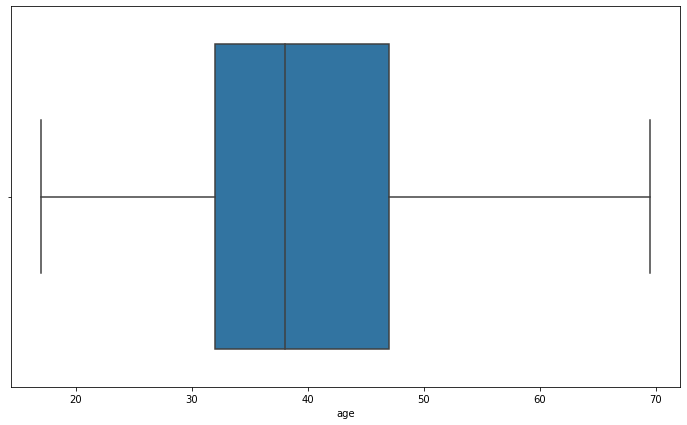

job


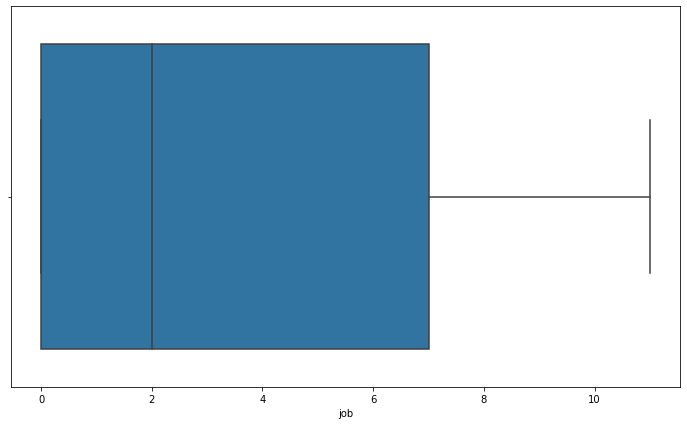

marital


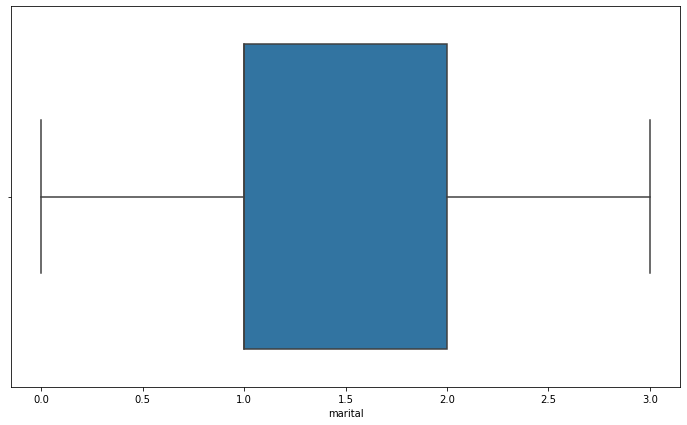

education


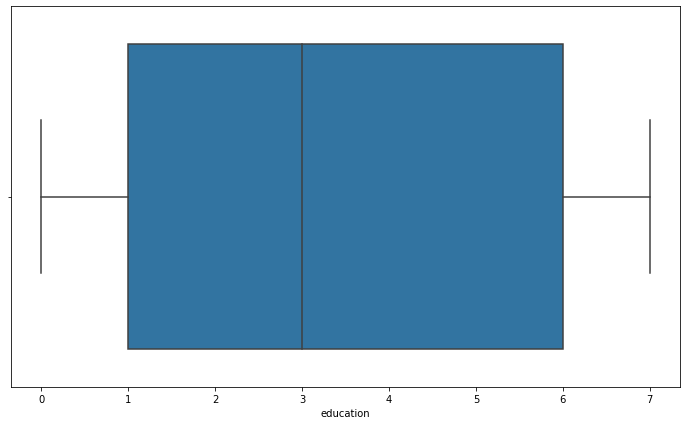

default


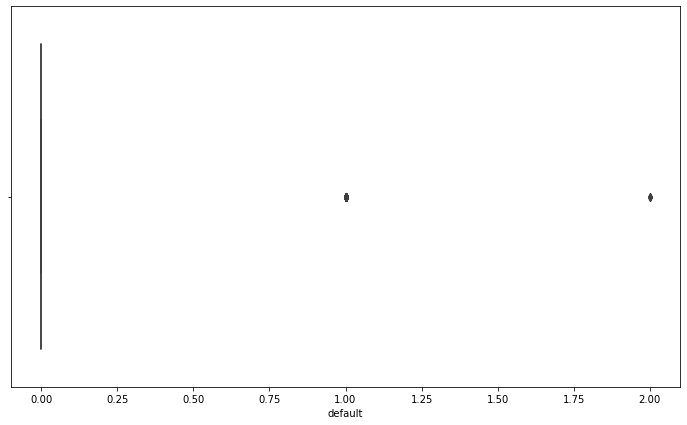

housing


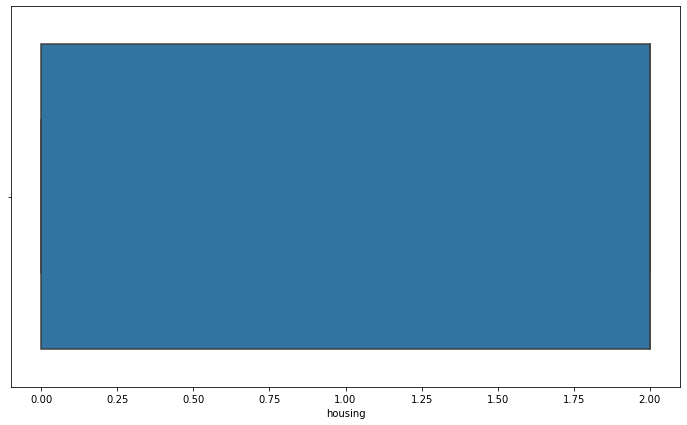

loan


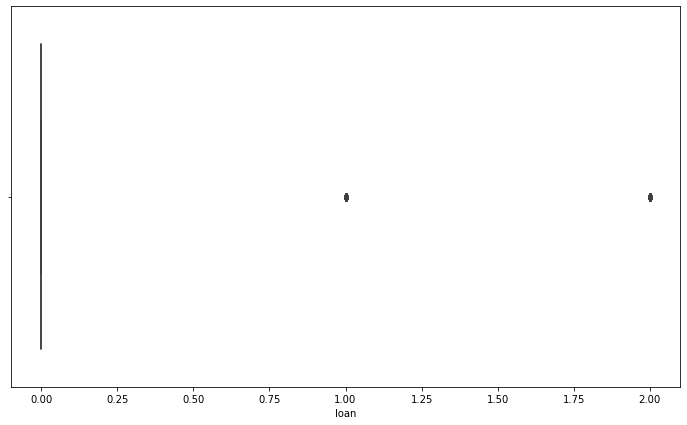

contact


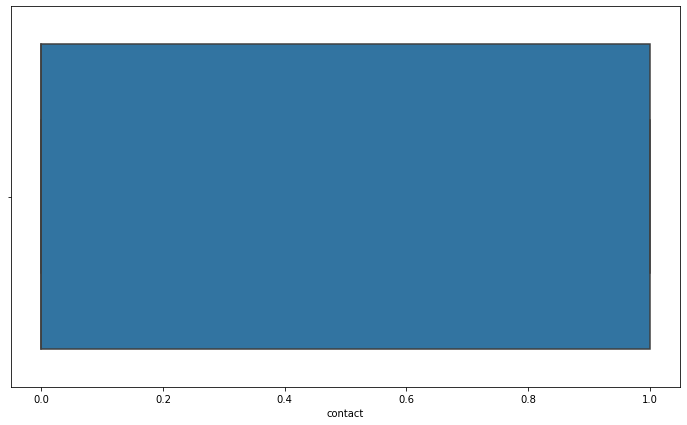

month


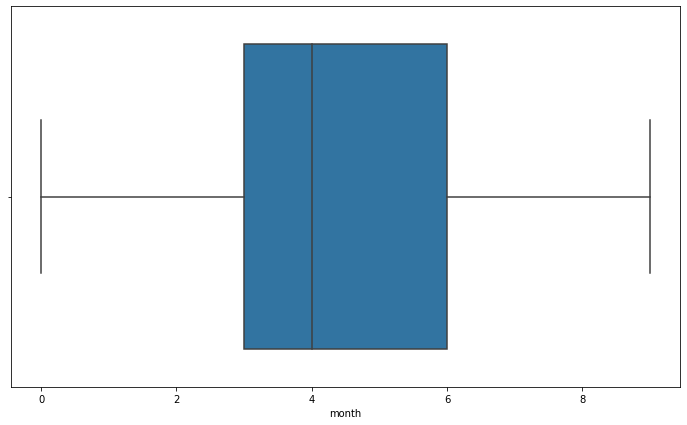

day_of_week


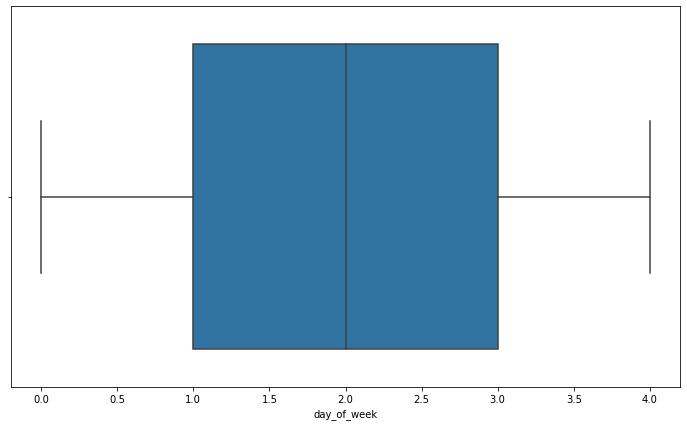

duration


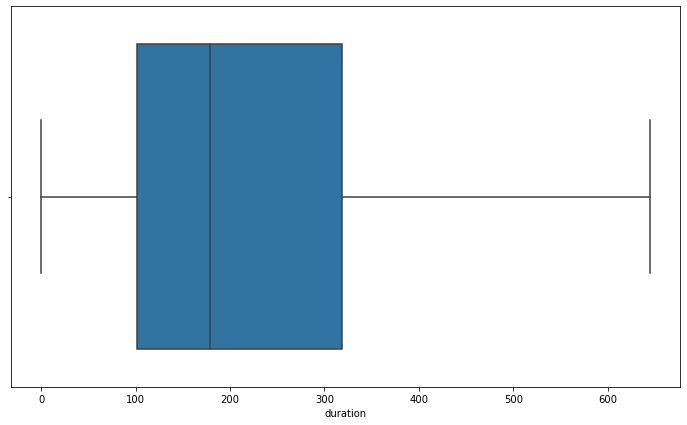

campaign


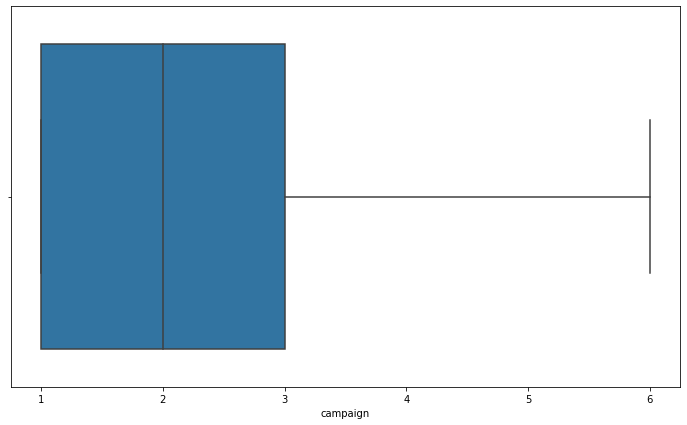

poutcome


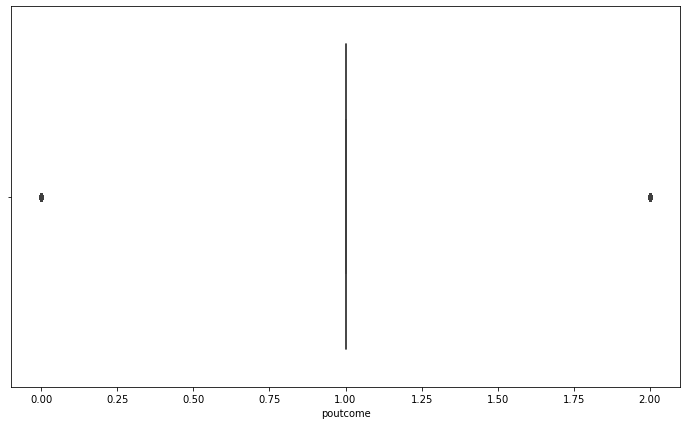

y


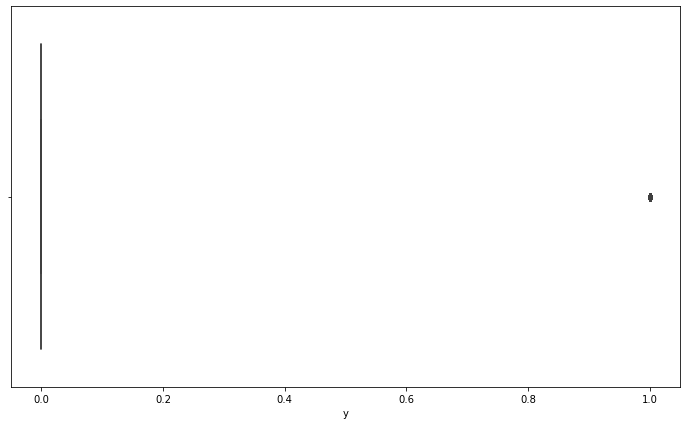

In [133]:
for i in df_c.columns:
    print(i)
    sns.boxplot(df_c[i])
    plt.show()

# Since there are no outliers we will continue to build a simple model

In [135]:
for i in df_c.columns:
    print(i)
    print(df_c[i].value_counts(),'\n','\n')


age
31.0    2343
33.0    2223
32.0    2218
36.0    2158
35.0    2101
34.0    2086
30.0    2063
37.0    1790
29.0    1735
39.0    1733
38.0    1675
41.0    1525
55.0    1490
40.0    1377
42.0    1369
45.0    1335
43.0    1283
46.0    1237
28.0    1203
44.0    1196
48.0    1183
26.0    1133
47.0    1109
50.0    1043
27.0    1027
49.0    1008
52.0     933
51.0     907
53.0     883
54.0     812
56.0     704
57.0     646
25.0     598
58.0     576
69.5     469
59.0     463
24.0     463
60.0     283
23.0     226
22.0     137
21.0     102
61.0      73
20.0      65
62.0      62
64.0      57
66.0      57
63.0      55
65.0      44
19.0      42
69.0      34
68.0      33
18.0      28
67.0      26
17.0       5
Name: age, dtype: int64 
 

job
0     12530
1     11067
9      8086
7      4742
4      3503
5      2074
2      1752
6      1743
3      1265
10     1230
8      1039
11      395
Name: job, dtype: int64 
 

marital
1    29903
2    13879
0     5549
3       95
Name: marital, dtype: int64 
 

educat

In [140]:
df_c.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [146]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df_s = pd.DataFrame(st.fit_transform(df_c.drop('y', axis = 1)))
df_s.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign','poutcome']
df_s

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,0.413394,-0.758118,-0.282989,-1.416731,1.953083,0.941913,-0.451591,-0.75834,-1.391751,-0.005247,-0.136266,-0.829535,0.191921
1,1.317570,1.467232,-0.282989,0.791107,-0.511633,-1.087865,-0.451591,-0.75834,1.194209,-1.438156,-0.548481,-0.829535,0.191921
2,-1.194029,0.076389,1.358681,1.232675,-0.511633,0.941913,-0.451591,-0.75834,-0.098771,-0.005247,0.602284,0.483030,2.954259
3,-0.088926,0.910895,-0.282989,-0.533596,-0.511633,-1.087865,-0.451591,-0.75834,-1.822745,-1.438156,-0.279396,-0.173253,0.191921
4,1.518498,0.354557,-0.282989,-1.416731,-0.511633,0.941913,-0.451591,-0.75834,-1.391751,-1.438156,-0.554206,-0.829535,2.954259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49421,0.815250,0.076389,-0.282989,-0.533596,-0.511633,0.941913,-0.451591,-0.75834,0.763216,0.711207,1.833202,-0.829535,0.191921
49422,-0.993102,0.910895,1.358681,-0.092028,-0.511633,0.941913,-0.451591,-0.75834,0.763216,-1.438156,-0.428251,-0.829535,0.191921
49423,-0.691710,0.910895,-0.282989,-0.092028,-0.511633,-1.087865,-0.451591,-0.75834,-0.098771,-0.721702,1.363736,-0.829535,-2.570418
49424,0.413394,-0.758118,-0.282989,-0.975163,-0.511633,0.941913,2.315966,1.31867,0.763216,-0.721702,1.833202,1.795596,0.191921


In [147]:
df_cc = pd.concat([df_s, df.y],axis = 1)
df_cc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,0.413394,-0.758118,-0.282989,-1.416731,1.953083,0.941913,-0.451591,-0.75834,-1.391751,-0.005247,-0.136266,-0.829535,0.191921,0.0
1,1.317570,1.467232,-0.282989,0.791107,-0.511633,-1.087865,-0.451591,-0.75834,1.194209,-1.438156,-0.548481,-0.829535,0.191921,0.0
2,-1.194029,0.076389,1.358681,1.232675,-0.511633,0.941913,-0.451591,-0.75834,-0.098771,-0.005247,0.602284,0.483030,2.954259,1.0
3,-0.088926,0.910895,-0.282989,-0.533596,-0.511633,-1.087865,-0.451591,-0.75834,-1.822745,-1.438156,-0.279396,-0.173253,0.191921,0.0
4,1.518498,0.354557,-0.282989,-1.416731,-0.511633,0.941913,-0.451591,-0.75834,-1.391751,-1.438156,-0.554206,-0.829535,2.954259,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49421,0.815250,0.076389,-0.282989,-0.533596,-0.511633,0.941913,-0.451591,-0.75834,0.763216,0.711207,1.833202,-0.829535,0.191921,NaN
49422,-0.993102,0.910895,1.358681,-0.092028,-0.511633,0.941913,-0.451591,-0.75834,0.763216,-1.438156,-0.428251,-0.829535,0.191921,NaN
49423,-0.691710,0.910895,-0.282989,-0.092028,-0.511633,-1.087865,-0.451591,-0.75834,-0.098771,-0.721702,1.363736,-0.829535,-2.570418,NaN
49424,0.413394,-0.758118,-0.282989,-0.975163,-0.511633,0.941913,2.315966,1.31867,0.763216,-0.721702,1.833202,1.795596,0.191921,NaN


In [164]:
df_c_train = df_cc.iloc[:41188,:]
df_c_train.info()
df_c_test = df_cc.iloc[41188:,:]
df_c_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  float64
 1   job          41188 non-null  float64
 2   marital      41188 non-null  float64
 3   education    41188 non-null  float64
 4   default      41188 non-null  float64
 5   housing      41188 non-null  float64
 6   loan         41188 non-null  float64
 7   contact      41188 non-null  float64
 8   month        41188 non-null  float64
 9   day_of_week  41188 non-null  float64
 10  duration     41188 non-null  float64
 11  campaign     41188 non-null  float64
 12  poutcome     41188 non-null  float64
 13  y            41188 non-null  float64
dtypes: float64(14)
memory usage: 4.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 41188 to 49425
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------

# simple model

In [151]:
X = df_c_train.drop('y',axis = 1)
y = df_c_train.y

In [153]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [157]:
md = linear_model.LogisticRegression()
md.fit(X_train,y_train)
y_p = md.predict(X_test)
print(classification_report(y_p,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     11676
         1.0       0.26      0.53      0.35       681

    accuracy                           0.89     12357
   macro avg       0.61      0.72      0.64     12357
weighted avg       0.93      0.89      0.91     12357



In [162]:
df_c_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
41188,-0.792174,0.076389,-1.924660,1.232675,-0.511633,-1.087865,-0.451591,-0.75834,-0.529765,0.711207,-0.588557,1.795596,0.191921
41189,-0.289854,1.745401,3.000352,1.232675,-0.511633,-1.087865,-0.451591,-0.75834,-0.098771,0.711207,-0.766038,-0.829535,0.191921
41190,1.518498,0.354557,-1.924660,0.791107,1.953083,0.941913,-0.451591,-0.75834,-0.529765,-0.005247,-0.588557,-0.173253,0.191921
41191,0.413394,-0.479949,-0.282989,-1.416731,1.953083,-1.087865,-0.451591,1.31867,-0.098771,0.711207,-1.063749,-0.173253,0.191921
41192,-1.194029,-1.036286,1.358681,-0.092028,-0.511633,-1.087865,-0.451591,-0.75834,0.332222,-1.438156,-0.514129,-0.173253,0.191921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49421,0.815250,0.076389,-0.282989,-0.533596,-0.511633,0.941913,-0.451591,-0.75834,0.763216,0.711207,1.833202,-0.829535,0.191921
49422,-0.993102,0.910895,1.358681,-0.092028,-0.511633,0.941913,-0.451591,-0.75834,0.763216,-1.438156,-0.428251,-0.829535,0.191921
49423,-0.691710,0.910895,-0.282989,-0.092028,-0.511633,-1.087865,-0.451591,-0.75834,-0.098771,-0.721702,1.363736,-0.829535,-2.570418
49424,0.413394,-0.758118,-0.282989,-0.975163,-0.511633,0.941913,2.315966,1.31867,0.763216,-0.721702,1.833202,1.795596,0.191921


In [165]:
df_testing = df_c_test.drop('y', axis = 1)
df_testing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
41188,-0.792174,0.076389,-1.924660,1.232675,-0.511633,-1.087865,-0.451591,-0.75834,-0.529765,0.711207,-0.588557,1.795596,0.191921
41189,-0.289854,1.745401,3.000352,1.232675,-0.511633,-1.087865,-0.451591,-0.75834,-0.098771,0.711207,-0.766038,-0.829535,0.191921
41190,1.518498,0.354557,-1.924660,0.791107,1.953083,0.941913,-0.451591,-0.75834,-0.529765,-0.005247,-0.588557,-0.173253,0.191921
41191,0.413394,-0.479949,-0.282989,-1.416731,1.953083,-1.087865,-0.451591,1.31867,-0.098771,0.711207,-1.063749,-0.173253,0.191921
41192,-1.194029,-1.036286,1.358681,-0.092028,-0.511633,-1.087865,-0.451591,-0.75834,0.332222,-1.438156,-0.514129,-0.173253,0.191921


# Predicting test data y value

In [172]:
test_p = md.predict(df_testing)

In [184]:
test_pr = test_p

In [177]:
test_pr.columns = ['y']
test_pr

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8233,1.0
8234,0.0
8235,0.0
8236,0.0


In [222]:
for i in df.columns:
    print(i.title())
    print(df[i].value_counts(),'\n','\n')

Age
31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
34.0    1745
30.0    1714
37.0    1475
29.0    1453
39.0    1432
38.0    1407
41.0    1278
40.0    1161
42.0    1142
45.0    1103
43.0    1055
46.0    1030
44.0    1011
28.0    1001
48.0     979
47.0     928
50.0     875
27.0     851
49.0     839
52.0     779
51.0     754
53.0     733
56.0     704
26.0     698
54.0     684
55.0     648
57.0     646
25.0     598
58.0     576
69.5     469
24.0     463
59.0     463
60.0     283
23.0     226
22.0     137
21.0     102
61.0      73
20.0      65
62.0      62
64.0      57
66.0      57
63.0      55
65.0      44
19.0      42
69.0      34
68.0      33
18.0      28
67.0      26
17.0       5
Name: age, dtype: int64 
 

Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown  

In [242]:
pd.DataFrame(df.groupby(['default','y'])['y'].size())

y
default y       
no      0  28391
        1   4197
unknown 0   8154
        1    443
yes     0      3

In [231]:
df.marital

0        married
1        married
2         single
3        married
4        married
          ...   
41183    married
41184    married
41185     single
41186    married
41187     single
Name: marital, Length: 41188, dtype: object

In [232]:
df.marital.replace(['unknown'],df.marital.mode(),inplace = True ) 

In [243]:
tukey=pairwise_tukeyhsd(df.y,df.default,alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
     no unknown  -0.0773  0.001 -0.0862 -0.0683   True
     no     yes  -0.1288 0.7379 -0.5545   0.297  False
unknown     yes  -0.0515    0.9 -0.4773  0.3743  False
------------------------------------------------------


In [244]:
df.default.replace(['unknown'],'yes',inplace = True ) 

In [245]:
df.default.value_counts()

no     32588
yes     8600
Name: default, dtype: int64